# What is the number of EMBL publications per publisher?

This is the question addressed by this notebook

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from copy import deepcopy
from numpy import nan
from pywaffle import Waffle

import local.config as conf
from osim_utils.clients.crossref import CrossRefClient
from osim_utils.clients.sherpa import SherpaClient
from osim_utils.exceptions import DataNotFoundError, DataValidationError, ApiClientError

In [17]:
# Download all metadata from Converis export, read in data
# In input file, change column name of eISSN ISSN Publisher and Journal name
dataPath = os.path.abspath('/Users/yan/Documents/Python_projects/EMBL_OSIM/data/2023_embl_closed.tsv')
df= pd.read_csv(dataPath, sep='\t', encoding='latin-1')

In [18]:
# issn2pub dict are Sherpa results saved from cache of previous runs
issn2pub = {'1524-0215': (np.nan, np.nan, np.nan), '1943-4731': (np.nan, np.nan, np.nan),
            '1087-0156': ('Nature Biotechnology', 'Nature Research', 'no'),
            '1546-1696': ('Nature Biotechnology', 'Nature Research', 'no'),
            '2168-6203': ('JAMA Pediatrics', 'American Medical Association', 'no'),
            '2168-6211': ('JAMA Pediatrics', 'American Medical Association', 'no'),
            '2168-622X': ('JAMA Psychiatry', 'American Medical Association', 'no'),
            '2168-6238': ('JAMA Psychiatry', 'American Medical Association', 'no'),
            '0014-5793': ('FEBS Letters', 'Wiley', 'no'), '1873-3468': ('FEBS Letters', 'Wiley', 'no'),
            '1574-7891': (np.nan, np.nan, np.nan), '1878-0261': (np.nan, np.nan, np.nan),
            'Not Available: spaces etc.': (np.nan, np.nan, np.nan), '2366-7478': (np.nan, np.nan, np.nan),
            '1616-301X': ('Advanced Functional Materials', 'Wiley', 'no'),
            '1616-3028': ('Advanced Functional Materials', 'Wiley', 'no'),
            '2192-2640': ('Advanced Healthcare Materials', 'Wiley', 'no'),
            '2192-2659': ('Advanced Healthcare Materials', 'Wiley', 'no'),
            '0935-9648': ('Advanced Materials', 'Wiley', 'no'), '1521-4095': ('Advanced Materials', 'Wiley', 'no'),
            '2365-709X': ('Advanced Materials Technologies', 'Wiley', 'no'),
            '1615-4150': ('Advanced Synthesis & Catalysis', 'Wiley', 'no'),
            '1615-4169': ('Advanced Synthesis & Catalysis', 'Wiley', 'no'), '2366-3987': (np.nan, np.nan, np.nan),
            '2198-3844': ('Advanced Science', 'Wiley Open Access', 'yes'),
            '0361-8609': ('American Journal of Hematology', 'Wiley', 'no'),
            '1096-8652': ('American Journal of Hematology', 'Wiley', 'no'),
            '1552-4841': ('American Journal of Medical Genetics Part B: Neuropsychiatric Genetics', 'Wiley', 'no'),
            '1552-485X': ('American Journal of Medical Genetics Part B: Neuropsychiatric Genetics', 'Wiley', 'no'),
            '1433-7851': ('Angewandte Chemie International Edition', 'Wiley', 'no'),
            '1521-3773': ('Angewandte Chemie International Edition', 'Wiley', 'no'),
            '2326-5191': ('Arthritis & Rheumatology', 'Wiley', 'no'),
            '2326-5205': ('Arthritis & Rheumatology', 'Wiley', 'no'), '0265-9247': ('BioEssays', 'Wiley', 'no'),
            '1521-1878': ('BioEssays', 'Wiley', 'no'), '0006-3525': ('Biopolymers', 'Wiley', 'no'),
            '1097-0282': ('Biopolymers', 'Wiley', 'no'), '2045-7634': ('Cancer Medicine', 'Wiley Open Access', 'yes'),
            '1439-4227': ('ChemBioChem', 'Wiley', 'no'), '1439-7633': ('ChemBioChem', 'Wiley', 'no'),
            '0947-6539': ('Chemistry - A European Journal', 'Wiley', 'no'),
            '1521-3765': ('Chemistry - A European Journal', 'Wiley', 'no'),
            '0009-3068': ('Chemistry & Industry', 'Wiley', 'no'), '2047-6329': ('Chemistry & Industry', 'Wiley', 'no'),
            '1860-7179': ('ChemMedChem', 'Wiley', 'no'), '1860-7187': ('ChemMedChem', 'Wiley', 'no'),
            '0021-9967': ('The Journal of Comparative Neurology', 'Wiley', 'no'),
            '1096-9861': ('The Journal of Comparative Neurology', 'Wiley', 'no'),
            '2573-8348': ('Cancer Reports', 'Wiley Open Access', 'yes'), '1934-3396': (np.nan, np.nan, np.nan),
            '1934-340X': (np.nan, np.nan, np.nan), '1439-4235': ('ChemPhysChem', 'Wiley', 'no'),
            '1439-7641': ('ChemPhysChem', 'Wiley', 'no'),
            '2691-1299': ('Current Protocols in Neuroscience', 'Wiley', 'no'),
            '1864-5631': ('ChemSusChem', 'Wiley', 'no'), '1864-564X': ('ChemSusChem', 'Wiley', 'no'),
            '2001-1326': ('Clinical and Translational Medicine', 'Wiley Open Access', 'yes'),
            '1552-4922': ('Cytometry Part A', 'Wiley', 'no'), '1552-4930': ('Cytometry Part A', 'Wiley', 'no'),
            '2045-7758': ('Ecology and Evolution', 'Wiley Open Access', 'yes'),
            '1388-9842': ('European Journal of Heart Failure', 'Wiley', 'no'),
            '1879-0844': ('European Journal of Heart Failure', 'Wiley', 'no'),
            '0014-2980': ('European Journal of Immunology', 'Wiley', 'no'),
            '1521-4141': ('European Journal of Immunology', 'Wiley', 'no'),
            '1434-193X': ('European Journal of Organic Chemistry', 'Wiley', 'no'),
            '1099-0690': ('European Journal of Organic Chemistry', 'Wiley', 'no'),
            '0741-0395': ('Genetic Epidemiology', 'Wiley', 'no'), '1098-2272': ('Genetic Epidemiology', 'Wiley', 'no'),
            '2641-6573': ('Advanced Genetics', 'Wiley Open Access', 'yes'), '0894-1491': ('Glia', 'Wiley', 'no'),
            '1098-1136': ('Glia', 'Wiley', 'no'), '0270-9139': ('Hepatology', 'Wiley', 'no'),
            '1527-3350': ('Hepatology', 'Wiley', 'no'),
            '1059-7794': ('Human Mutation: Variation, Informatics and Disease', 'Wiley', 'no'),
            '1098-1004': ('Human Mutation: Variation, Informatics and Disease', 'Wiley', 'no'),
            '0020-7136': ('International Journal of Cancer', 'Wiley', 'no'),
            '1097-0215': ('International Journal of Cancer', 'Wiley', 'no'), '1521-6543': ('IUBMB Life', 'Wiley', 'no'),
            '1521-6551': ('IUBMB Life', 'Wiley', 'no'), '1864-063X': ('Journal of Biophotonics', 'Wiley', 'no'),
            '1864-0648': ('Journal of Biophotonics', 'Wiley', 'no'),
            '0021-9541': ('Journal of Cellular Physiology', 'Wiley', 'no'),
            '1097-4652': ('Journal of Cellular Physiology', 'Wiley', 'no'),
            '2190-5991': ('Journal of Cachexia, Sarcopenia and Muscle', 'Wiley Open Access', 'yes'),
            '2190-6009': ('Journal of Cachexia, Sarcopenia and Muscle', 'Wiley Open Access', 'yes'), '1552-5007': (
    'Journal of Experimental Zoology Part B: Molecular and Developmental Evolution', 'Wiley', 'no'), '1552-5015': (
    'Journal of Experimental Zoology Part B: Molecular and Developmental Evolution', 'Wiley', 'no'),
            '0952-3499': ('Journal of Molecular Recognition', 'Wiley', 'no'),
            '1099-1352': ('Journal of Molecular Recognition', 'Wiley', 'no'),
            '1076-5174': ('Journal of Mass Spectrometry', 'Wiley', 'no'),
            '1096-9888': ('Journal of Mass Spectrometry', 'Wiley', 'no'),
            '0360-4012': ('Journal of Neuroscience Research', 'Wiley', 'no'),
            '1097-4547': ('Journal of Neuroscience Research', 'Wiley', 'no'),
            '1615-9306': ('Journal of Separation Science', 'Wiley', 'no'),
            '1615-9314': ('Journal of Separation Science', 'Wiley', 'no'),
            '2324-9269': ('Molecular Genetics and Genomic Medicine', 'Wiley Open Access', 'yes'),
            '1868-1743': ('Molecular Informatics', 'Wiley', 'no'),
            '1868-1751': ('Molecular Informatics', 'Wiley', 'no'), '1615-9853': ('Proteomics', 'Wiley', 'no'),
            '1615-9861': ('Proteomics', 'Wiley', 'no'),
            '0934-0866': ('Particle & Particle Systems Characterization', 'Wiley', 'no'),
            '1521-4117': ('Particle & Particle Systems Characterization', 'Wiley', 'no'),
            '0961-8368': ('Protein Science', 'Wiley', 'no'), '1469-896X': ('Protein Science', 'Wiley', 'no'),
            '0887-3585': ('Proteins: Structure, Function, and Bioinformatics', 'Wiley', 'no'),
            '1097-0134': ('Proteins: Structure, Function, and Bioinformatics', 'Wiley', 'no'),
            '1526-498X': ('Pest Management Science', 'Wiley', 'no'),
            '1526-4998': ('Pest Management Science', 'Wiley', 'no'),
            '1075-2617': ('Journal of Peptide Science', 'Wiley', 'no'),
            '1099-1387': ('Journal of Peptide Science', 'Wiley', 'no'),
            '2163-8306': ('CPT: Pharmacometrics and Systems Pharmacology', 'Wiley Open Access', 'yes'),
            '0951-4198': ('Rapid Communications in Mass Spectrometry', 'Wiley', 'no'),
            '1097-0231': ('Rapid Communications in Mass Spectrometry', 'Wiley', 'no'),
            '1613-6810': ('Small', 'Wiley', 'no'), '1613-6829': ('Small', 'Wiley', 'no'),
            '1066-5099': ('Stem Cells', 'Oxford University Press', 'no'),
            '1549-4918': ('Stem Cells', 'Oxford University Press', 'no'),
            '1940-3372': ('The Plant Genome', 'Wiley Open Access', 'yes'), '1064-3745': (np.nan, np.nan, np.nan),
            '1940-6029': (np.nan, np.nan, np.nan),
            '1420-682X': ('Cellular and Molecular Life Sciences', 'Birkhäuser Verlag', 'no'),
            '1420-9071': ('Cellular and Molecular Life Sciences', 'Birkhäuser Verlag', 'no'),
            '0946-2716': ('Journal of Molecular Medicine', 'Springer', 'no'),
            '1432-1440': ('Journal of Molecular Medicine', 'Springer', 'no'),
            '0028-2804': ('Der Nervenarzt', 'Springer', 'no'), '1433-0407': ('Der Nervenarzt', 'Springer', 'no'),
            '0340-5761': ('Archives of Toxicology', 'Springer', 'no'),
            '1432-0738': ('Archives of Toxicology', 'Springer', 'no'),
            '0033-3158': ('Psychopharmacology', 'Springer', 'no'),
            '1432-2072': ('Psychopharmacology', 'Springer', 'no'),
            '1618-2642': ('Analytical and Bioanalytical Chemistry', 'Springer', 'no'),
            '1618-2650': ('Analytical and Bioanalytical Chemistry', 'Springer', 'no'),
            '0175-7571': ('European Biophysics Journal with Biophysics Letters', 'Springer', 'no'),
            '1432-1017': ('European Biophysics Journal with Biophysics Letters', 'Springer', 'no'),
            '1863-2297': ('Seminars in Immunopathology', 'Springer', 'no'),
            '1863-2300': ('Seminars in Immunopathology', 'Springer', 'no'),
            '0172-8083': ('Current Genetics', 'Springer', 'no'), '1432-0983': ('Current Genetics', 'Springer', 'no'),
            '0938-8990': ('Mammalian Genome', 'Springer', 'no'), '1432-1777': ('Mammalian Genome', 'Springer', 'no'),
            '0300-8428': ('Basic Research in Cardiology', 'Springer', 'no'),
            '1435-1803': ('Basic Research in Cardiology', 'Springer', 'no'),
            '0001-6322': ('Acta Neuropathologica', 'Springer', 'no'),
            '1432-0533': ('Acta Neuropathologica', 'Springer', 'no'),
            '0948-6143': ('Histochemistry and Cell Biology', 'Springer', 'no'),
            '1432-119X': ('Histochemistry and Cell Biology', 'Springer', 'no'),
            '0031-6768': ('Pflügers Archiv European Journal of Physiology', 'Springer', 'no'),
            '1432-2013': ('Pflügers Archiv European Journal of Physiology', 'Springer', 'no'),
            '1863-2653': ('Brain Structure and Function', 'Springer', 'no'),
            '1863-2661': ('Brain Structure and Function', 'Springer', 'no'),
            '0340-6717': ('Human Genetics', 'Springer', 'no'), '1432-1203': ('Human Genetics', 'Springer', 'no'),
            '0941-4355': ('Supportive Care in Cancer', 'Springer', 'no'),
            '1433-7339': ('Supportive Care in Cancer', 'Springer', 'no'),
            '1386-2588': ('Aquatic Ecology', 'Springer', 'no'), '1573-5125': ('Aquatic Ecology', 'Springer', 'no'),
            '0003-6072': ('Antonie van Leeuwenhoek', 'Springer', 'no'),
            '1572-9699': ('Antonie van Leeuwenhoek', 'Springer', 'no'),
            '0957-5243': ('Cancer Causes and Control', 'Springer', 'no'),
            '1573-7225': ('Cancer Causes and Control', 'Springer', 'no'),
            '0742-2091': ('Cell Biology and Toxicology', 'Springer', 'no'),
            '1573-6822': ('Cell Biology and Toxicology', 'Springer', 'no'),
            '0272-4340': ('Cellular and Molecular Neurobiology', 'Springer', 'no'),
            '1573-6830': ('Cellular and Molecular Neurobiology', 'Springer', 'no'),
            '1566-0621': ('Conservation Genetics', 'Springer', 'no'),
            '1572-9737': ('Conservation Genetics', 'Springer', 'no'),
            '1381-2416': ('International Journal of Speech Technology', 'Springer', 'no'),
            '1572-8110': ('International Journal of Speech Technology', 'Springer', 'no'),
            '0920-654X': ('Journal of Computer-Aided Molecular Design', 'Springer', 'no'),
            '1573-4951': ('Journal of Computer-Aided Molecular Design', 'Springer', 'no'),
            '0925-2738': ('Journal of Biomolecular NMR', 'Springer', 'no'),
            '1573-5001': ('Journal of Biomolecular NMR', 'Springer', 'no'),
            '0271-9142': ('Journal of Clinical Immunology', 'Springer', 'no'),
            '1573-2592': ('Journal of Clinical Immunology', 'Springer', 'no'),
            '1083-3021': ('Journal of Mammary Gland Biology and Neoplasia', 'Springer', 'no'),
            '1573-7039': ('Journal of Mammary Gland Biology and Neoplasia', 'Springer', 'no'),
            '1573-3882': ('Metabolomics', 'Springer', 'no'), '1573-3890': ('Metabolomics', 'Springer', 'no'),
            '1539-2791': ('Neuroinformatics', 'Springer', 'no'), '1559-0089': ('Neuroinformatics', 'Springer', 'no'),
            '0893-7648': ('Molecular Neurobiology', 'Springer', 'no'),
            '1559-1182': ('Molecular Neurobiology', 'Springer', 'no'),
            '1873-9601': ('Journal of Cell Communication and Signaling', 'Springer', 'no'),
            '1873-961X': ('Journal of Cell Communication and Signaling', 'Springer', 'no'),
            '1874-2718': ('Biomolecular NMR Assignments', 'Springer', 'no'),
            '1874-270X': ('Biomolecular NMR Assignments', 'Springer', 'no'),
            '1046-1310 ': ('Current Psychology', 'Springer', 'no'),
            '1936-4733': ('Current Psychology', 'Springer', 'no'),
            '1355-8145': ('Cell Stress and Chaperones', 'Springer', 'no'),
            '1466-1268': ('Cell Stress and Chaperones', 'Springer', 'no'), '1875-2292': (np.nan, np.nan, np.nan),
            '1875-2284': (np.nan, np.nan, np.nan), '1867-2450': ('Biophysical Reviews', 'Springer', 'no'),
            '1867-2469': ('Biophysical Reviews', 'Springer', 'no'),
            '2211-3436': ('Cellular Oncology', 'Springer', 'no'), '0140-6736': ('The Lancet', 'Elsevier', 'no'),
            '1474-547X': ('The Lancet', 'Elsevier', 'no'), '1470-2045': ('The Lancet Oncology', 'Elsevier', 'no'),
            '1474-5488': ('The Lancet Oncology', 'Elsevier', 'no'),
            '1473-3099': ('The Lancet Infectious Diseases', 'Elsevier', 'no'),
            '1474-4457': ('The Lancet Infectious Diseases', 'Elsevier', 'no'),
            '2405-4704': ('The Lancet HIV', 'Elsevier', 'no'), '2352-3018': ('The Lancet HIV', 'Elsevier', 'no'),
            '2666-5247': ('The Lancet Microbe', 'Elsevier', 'yes'), '0070-2153': (np.nan, np.nan, np.nan),
            '1557-8933': (np.nan, np.nan, np.nan), '0076-6879': (np.nan, np.nan, np.nan),
            '1557-7988': (np.nan, np.nan, np.nan), '0003-2697': ('Analytical Biochemistry', 'Elsevier', 'no'),
            '1096-0309': ('Analytical Biochemistry', 'Elsevier', 'no'),
            '0003-9861': ('Archives of Biochemistry and Biophysics', 'Elsevier', 'no'),
            '1096-0384': ('Archives of Biochemistry and Biophysics', 'Elsevier', 'no'),
            '0002-9297': ('American Journal of Human Genetics', 'Cell Press', 'no'),
            '1537-6605': ('American Journal of Human Genetics', 'Cell Press', 'no'),
            ' 2211-9264': (np.nan, np.nan, np.nan), '0166-445X': ('Aquatic Toxicology', 'Elsevier', 'no'),
            '1879-1514': ('Aquatic Toxicology', 'Elsevier', 'no'),
            '0003-4975': ('The Annals of Thoracic Surgery', 'Elsevier', 'no'),
            '1552-6259': ('The Annals of Thoracic Surgery', 'Elsevier', 'no'), '2667-0909': (np.nan, np.nan, np.nan),
            '2667-0895': (np.nan, np.nan, np.nan), '0925-4439': ('BBA - Molecular Basis of Disease', 'Elsevier', 'no'),
            '1879-260X': ('BBA - Molecular Basis of Disease', 'Elsevier', 'no'),
            '1874-9399': ('BBA - Gene Regulatory Mechanisms', 'Elsevier', 'no'),
            '1876-4320': ('BBA - Gene Regulatory Mechanisms', 'Elsevier', 'no'),
            '0167-4889': ('Biochimica et Biophysica Acta (BBA) - Molecular Cell Research', 'Elsevier', 'no'),
            '1879-2596': ('Biochimica et Biophysica Acta (BBA) - Molecular Cell Research', 'Elsevier', 'no'),
            '0005-2736': ('BBA - Biomembranes', 'Elsevier', 'no'),
            '1879-2642': ('BBA - Biomembranes', 'Elsevier', 'no'),
            '1570-9639': ('BBA - Proteins and Proteomics', 'Elsevier', 'no'),
            '1878-1454': ('BBA - Proteins and Proteomics', 'Elsevier', 'no'),
            '0006-291X': ('Biochemical and Biophysical Research Communications', 'Elsevier', 'no'),
            '1090-2104': ('Biochemical and Biophysical Research Communications', 'Elsevier', 'no'),
            '0300-9084': ('Biochimie', 'Elsevier', 'no'), '1638-6183': ('Biochimie', 'Elsevier', 'no'),
            '0142-9612': ('Biomaterials', 'Elsevier', 'no'), '1878-5905': ('Biomaterials', 'Elsevier', 'no'),
            '0006-3223': ('Biological Psychiatry', 'Elsevier', 'no'),
            '1873-2402': ('Biological Psychiatry', 'Elsevier', 'no'),
            '0968-0896': ('Bioorganic and Medicinal Chemistry', 'Elsevier', 'no'),
            '1464-3391': ('Bioorganic and Medicinal Chemistry', 'Elsevier', 'no'),
            '0301-4622': ('Biophysical Chemistry', 'Elsevier', 'no'),
            '1873-4200': ('Biophysical Chemistry', 'Elsevier', 'no'),
            '0006-3495': ('Biophysical Journal', 'Elsevier', 'no'),
            '1542-0086': ('Biophysical Journal', 'Elsevier', 'no'), '0006-8993': ('Brain Research', 'Elsevier', 'no'),
            '1872-6240': ('Brain Research', 'Elsevier', 'no'),
            '0377-0427': ('Journal of Computational and Applied Mathematics', 'Elsevier', 'no'),
            '1879-1778': ('Journal of Computational and Applied Mathematics', 'Elsevier', 'no'),
            '1367-5931': ('Current Opinion in Chemical Biology', 'Elsevier', 'no'),
            '1879-0402': ('Current Opinion in Chemical Biology', 'Elsevier', 'no'),
            '0009-8981': ('Clinica Chimica Acta', 'Elsevier', 'no'),
            '1873-3492': ('Clinica Chimica Acta', 'Elsevier', 'no'), '1535-6108': ('Cancer Cell', 'Cell Press', 'no'),
            '1878-3686': ('Cancer Cell', 'Cell Press', 'no'),
            '0955-0674': ('Current Opinion in Cell Biology', 'Elsevier', 'no'),
            '1879-0410': ('Current Opinion in Cell Biology', 'Elsevier', 'no'), '0092-8674': ('Cell', 'Elsevier', 'no'),
            '1097-4172': ('Cell', 'Elsevier', 'no'), '2211-1247': ('Cell Reports', 'Cell Press', 'yes'),
            '2405-4712': ('Cell Systems', 'Elsevier', 'no'),
            '1542-3565': ('Clinical Gastroenterology and Hepatology', 'Elsevier', 'no'),
            '1542-7714': ('Clinical Gastroenterology and Hepatology', 'Elsevier', 'no'),
            '2451-9456': ('Cell chemical biology', 'Cell Press', 'no'),
            '2451-9448': ('Cell chemical biology', 'Cell Press', 'no'),
            '0009-3084': ('Chemistry and Physics of Lipids', 'Elsevier', 'no'),
            '1873-2941': ('Chemistry and Physics of Lipids', 'Elsevier', 'no'), '2451-9294': (np.nan, np.nan, np.nan),
            '1931-3128': ('Cell Host & Microbe', 'Cell Press', 'no'),
            '1934-6069': ('Cell Host & Microbe', 'Cell Press', 'no'),
            '1550-4131': ('Cell Metabolism', 'Cell Press', 'no'), '1932-7420': ('Cell Metabolism', 'Cell Press', 'no'),
            '1198-743X': ('Clinical Microbiology and Infection', 'Elsevier', 'no'),
            '1469-0691': ('Clinical Microbiology and Infection', 'Elsevier', 'no'),
            '2452-3100': ('Current Opinion in Systems Biology', 'Elsevier', 'no'),
            '0959-4388': ('Current Opinion in Neurobiology', 'Elsevier', 'no'),
            '1873-6882': ('Current Opinion in Neurobiology', 'Elsevier', 'no'),
            '2667-2375 ': ('Cell Reports: Methods', 'Cell Press', 'yes'),
            ' 2667-2375': ('Cell Reports: Methods', 'Cell Press', 'yes'),
            '2665-928X ': ('Current Research in Structural Biology', 'Elsevier', 'yes'),
            '2001-0370': ('Computational and Structural Biotechnology Journal', 'Elsevier', 'yes'),
            '2405-6308': ('Clinical and Translational Radiation Oncology', 'Elsevier', 'yes'),
            '0960-9822': ('Current Biology', 'Cell Press', 'no'), '1879-0445': ('Current Biology', 'Cell Press', 'no'),
            '1534-5807': ('Developmental Cell', 'Elsevier', 'no'),
            '1878-1551': ('Developmental Cell', 'Elsevier', 'no'), '2352-3409': ('Data in Brief', 'Elsevier', 'yes'),
            '1568-7864': ('DNA Repair', 'Elsevier', 'no'), '1568-7856': ('DNA Repair', 'Elsevier', 'no'),
            '1359-6446': ('Drug Discovery Today', 'Elsevier', 'no'),
            '1878-5832': ('Drug Discovery Today', 'Elsevier', 'no'), '2352-3964': ('EBioMedicine', 'Elsevier', 'yes'),
            '1574-9541': ('Ecological Informatics', 'Elsevier', 'no'),
            '1878-0512': ('Ecological Informatics', 'Elsevier', 'no'),
            '0171-9335': ('European Journal of Cell Biology', 'Elsevier', 'yes'),
            '1618-1298': ('European Journal of Cell Biology', 'Elsevier', 'yes'),
            '0223-5234': ('European Journal of Medicinal Chemistry', 'Elsevier', 'no'),
            '1768-3254': ('European Journal of Medicinal Chemistry', 'Elsevier', 'no'),
            '1769-7212': ('European Journal of Medical Genetics', 'Elsevier', 'no'),
            '1878-0849': ('European Journal of Medical Genetics', 'Elsevier', 'no'),
            '0014-2999': ('European Journal of Pharmacology', 'Elsevier', 'no'),
            '1879-0712': ('European Journal of Pharmacology', 'Elsevier', 'no'),
            '2352-4316': ('Extreme Mechanics Letters', 'Elsevier', 'no'),
            '0302-2838': ('European Urology', 'Elsevier', 'no'), '1873-7560': ('European Urology', 'Elsevier', 'no'),
            '0301-472X': ('Experimental Hematology', 'Elsevier', 'no'),
            '1873-2399': ('Experimental Hematology', 'Elsevier', 'no'),
            '0165-7836': ('Fisheries Research', 'Elsevier', 'no'),
            '1872-6763': ('Fisheries Research', 'Elsevier', 'no'), '0308-8146': ('Food Chemistry', 'Elsevier', 'no'),
            '1873-7072': ('Food Chemistry', 'Elsevier', 'no'), '0956-7135': ('Food Control', 'Elsevier', 'no'),
            '1873-7129': ('Food Control', 'Elsevier', 'no'),
            '0891-5849': ('Free Radical Biology and Medicine', 'Elsevier', 'no'),
            '1873-4596': ('Free Radical Biology and Medicine', 'Elsevier', 'no'),
            '0959-437X': ('Current Opinion in Genetics and Development', 'Elsevier', 'no'),
            '1879-0380': ('Current Opinion in Genetics and Development', 'Elsevier', 'no'),
            '1098-3600': ('Genetics in Medicine', 'Elsevier', 'no'),
            '1530-0366': ('Genetics in Medicine', 'Elsevier', 'no'),
            '1672-0229': ('Genomics, Proteomics and Bioinformatics', 'Elsevier', 'yes'),
            '2210-3244': ('Genomics, Proteomics and Bioinformatics', 'Elsevier', 'yes'),
            '2405-8440': ('Heliyon', 'Elsevier', 'yes'), '0890-5401': ('Information and Computation', 'Elsevier', 'no'),
            '1090-2651': ('Information and Computation', 'Elsevier', 'no'),
            '0141-8130': ('International Journal of Biological Macromolecules', 'Elsevier', 'no'),
            '1879-0003': ('International Journal of Biological Macromolecules', 'Elsevier', 'no'),
            '1387-3806': ('International Journal of Mass Spectrometry', 'Elsevier', 'no'),
            '0360-3016': ('International Journal of Radiation Oncology - Biology - Physics', 'Elsevier', 'no'),
            '1879-355X': ('International Journal of Radiation Oncology - Biology - Physics', 'Elsevier', 'no'),
            '1074-7613': ('Immunity', 'Elsevier', 'no'), '1097-4180': ('Immunity', 'Elsevier', 'no'),
            '1567-5769': ('International Immunopharmacology', 'Elsevier', 'no'),
            '1878-1705': ('International Immunopharmacology', 'Elsevier', 'no'),
            '2589-0042': ('iScience', 'Cell Press', 'yes'), '1471-4906': ('Trends in Immunology', 'Cell Press', 'no'),
            '1471-4981': ('Trends in Immunology', 'Cell Press', 'no'),
            '0091-6749': ('Journal of Allergy and Clinical Immunology', 'Elsevier', 'no'),
            '1097-6825': ('Journal of Allergy and Clinical Immunology', 'Elsevier', 'no'),
            '1933-2874': ('Journal of Clinical Lipidology', 'Elsevier', 'no'),
            '0021-9258': ('Journal of Biological Chemistry', 'Elsevier', 'yes'),
            '1083-351X': ('Journal of Biological Chemistry', 'Elsevier', 'yes'), ' 2352-345X': (np.nan, np.nan, np.nan),
            '1465-3249': ('Cytotherapy', 'Elsevier', 'no'), '1477-2566': ('Cytotherapy', 'Elsevier', 'no'),
            '0304-3894': ('Journal of Hazardous Materials', 'Elsevier', 'no'),
            '1873-3336': ('Journal of Hazardous Materials', 'Elsevier', 'no'),
            '0022-202X': ('Journal of Investigative Dermatology', 'Elsevier', 'no'),
            '1523-1747': ('Journal of Investigative Dermatology', 'Elsevier', 'no'),
            '0022-2275': ('Journal of Lipid Research', 'Elsevier', 'yes'),
            '1539-7262': ('Journal of Lipid Research', 'Elsevier', 'yes'),
            '0022-2836': ('Journal of Molecular Biology', 'Elsevier', 'no'),
            '1089-8638': ('Journal of Molecular Biology', 'Elsevier', 'no'),
            '1874-3919': ('Journal of Proteomics', 'Elsevier', 'no'),
            '1876-7737': ('Journal of Proteomics', 'Elsevier', 'no'),
            '1047-8477': ('Journal of Structural Biology', 'Elsevier', 'no'),
            '1095-8657': ('Journal of Structural Biology', 'Elsevier', 'no'),
            '0022-5193': ('Journal of Theoretical Biology', 'Elsevier', 'no'),
            '1095-8541': ('Journal of Theoretical Biology', 'Elsevier', 'no'),
            '0085-2538': ('Kidney International', 'Elsevier', 'no'),
            '1523-1755': ('Kidney International', 'Elsevier', 'no'),
            '0145-2126': ('Leukemia Research', 'Elsevier', 'no'), '1873-5835': ('Leukemia Research', 'Elsevier', 'no'),
            '0047-6374': ('Mechanisms of Ageing and Development', 'Elsevier', 'no'),
            '1872-6216': ('Mechanisms of Ageing and Development', 'Elsevier', 'no'),
            '0098-2997': ('Molecular Aspects of Medicine', 'Elsevier', 'no'),
            '1872-9452': ('Molecular Aspects of Medicine', 'Elsevier', 'no'),
            '1535-9476': ('Molecular & Cellular Proteomics', 'Elsevier', 'yes'),
            '1535-9484': ('Molecular & Cellular Proteomics', 'Elsevier', 'yes'),
            '1361-8415': ('Medical Image Analysis', 'Elsevier', 'no'),
            '1361-8423': ('Medical Image Analysis', 'Elsevier', 'no'),
            '1369-5274': ('Current Opinion in Microbiology', 'Elsevier', 'no'),
            '1879-0364': ('Current Opinion in Microbiology', 'Elsevier', 'no'),
            '1097-2765': ('Molecular Cell', 'Cell Press', 'no'), '1097-4164': ('Molecular Cell', 'Cell Press', 'no'),
            '1471-4914': ('Trends in Molecular Medicine', 'Cell Press', 'no'),
            '1471-499X': ('Trends in Molecular Medicine', 'Cell Press', 'no'),
            '2212-8778': ('Molecular Metabolism', 'Elsevier', 'yes'),
            '0969-9961': ('Neurobiology of Disease', 'Elsevier', 'yes'),
            '1095-953X': ('Neurobiology of Disease', 'Elsevier', 'yes'),
            '0197-4580': ('Neurobiology of Aging', 'Elsevier', 'no'),
            '1558-1497': ('Neurobiology of Aging', 'Elsevier', 'no'), '0896-6273': ('Neuron', 'Cell Press', 'no'),
            '1097-4199': ('Neuron', 'Cell Press', 'no'), '0028-3908': ('Neuropharmacology', 'Elsevier', 'no'),
            '1873-7064': ('Neuropharmacology', 'Elsevier', 'no'), '0306-4522': ('Neuroscience', 'Elsevier', 'no'),
            '1873-7544': ('Neuroscience', 'Elsevier', 'no'), '2468-0672': (np.nan, np.nan, np.nan),
            '2162-2531': ('Molecular Therapy - Nucleic Acids', 'Cell Press', 'yes'),
            '2590-3330': ('One Earth', 'Cell Press', 'no'), '2590-3322': ('One Earth', 'Cell Press', 'no'),
            '0161-6420': ('Ophthalmology', 'Elsevier', 'no'), '1549-4713': ('Ophthalmology', 'Elsevier', 'no'),
            '2213-5979': ('Photoacoustics', 'Elsevier', 'yes'), '2666-3899': ('Patterns', 'Cell Press', 'yes'),
            '0079-6107': ('Progress in Biophysics and Molecular Biology', 'Elsevier', 'no'),
            '1873-1732': ('Progress in Biophysics and Molecular Biology', 'Elsevier', 'no'),
            '1046-5928': ('Protein Expression and Purification', 'Elsevier', 'no'),
            '1096-0279': ('Protein Expression and Purification', 'Elsevier', 'no'),
            '1043-6618': ('Pharmacological Research', 'Elsevier', 'no'),
            '1096-1186': ('Pharmacological Research', 'Elsevier', 'no'), '0147-619X': ('Plasmid', 'Elsevier', 'no'),
            '1095-9890': ('Plasmid', 'Elsevier', 'no'), '0301-0082': ('Progress in Neurobiology', 'Elsevier', 'no'),
            '1873-5118': ('Progress in Neurobiology', 'Elsevier', 'no'), '1434-4610': ('Protist', 'Elsevier', 'no'),
            '1618-0941': ('Protist', 'Elsevier', 'no'), '1471-4922': ('Trends in Parasitology', 'Cell Press', 'no'),
            '1471-5007': ('Trends in Parasitology', 'Cell Press', 'no'), '2405-8521': (np.nan, np.nan, np.nan),
            '1472-6483': ('Reproductive BioMedicine Online', 'Elsevier', 'no'),
            '1472-6491': ('Reproductive BioMedicine Online', 'Elsevier', 'no'),
            '2213-2317': ('Redox Biology', 'Elsevier', 'yes'),
            '0959-440X': ('Current Opinion in Structural Biology', 'Elsevier', 'no'),
            '1879-033X': ('Current Opinion in Structural Biology', 'Elsevier', 'no'),
            '2095-9273': ('Science Bulletin', 'Elsevier', 'no'), '2095-9281': ('Science Bulletin', 'Elsevier', 'no'),
            '1044-579X': ('Seminars in Cancer Biology', 'Elsevier', 'no'),
            '1096-3650': ('Seminars in Cancer Biology', 'Elsevier', 'no'),
            '1084-9521': ('Seminars in Cell & Developmental Biology', 'Elsevier', 'no'),
            '1096-3634': ('Seminars in Cell & Developmental Biology', 'Elsevier', 'no'),
            '1389-9457': ('Sleep Medicine', 'Elsevier', 'no'), '1878-5506': ('Sleep Medicine', 'Elsevier', 'no'),
            '1934-5909': ('Cell Stem Cell', 'Elsevier', 'no'), '1875-9777': ('Cell Stem Cell', 'Elsevier', 'no'),
            '2213-6711': ('Stem Cell Reports', 'Cell Press', 'yes'), '0969-2126': ('Structure', 'Elsevier', 'no'),
            '1878-4186': ('Structure', 'Elsevier', 'no'),
            '0386-7196': ('Cell Structure and Function', 'Japan Society for Cell Biology', 'yes'),
            '1347-3700': ('Cell Structure and Function', 'Japan Society for Cell Biology', 'yes'),
            '0723-2020': ('Systematic and Applied Microbiology', 'Elsevier', 'no'),
            '1618-0984': ('Systematic and Applied Microbiology', 'Elsevier', 'no'),
            '0962-8924': ('Trends in Cell Biology', 'Elsevier', 'no'),
            '1879-3088': ('Trends in Cell Biology', 'Elsevier', 'no'),
            '1043-2760': ('Trends in Endocrinology & Metabolism', 'Cell Press', 'no'),
            '1879-3061': ('Trends in Endocrinology & Metabolism', 'Cell Press', 'no'),
            '0966-842X': ('Trends in Microbiology', 'Cell Press', 'no'),
            '1878-4380': ('Trends in Microbiology', 'Cell Press', 'no'),
            '0165-6147': ('Trends in Pharmacological Sciences', 'Cell Press', 'no'),
            '1873-3735': ('Trends in Pharmacological Sciences', 'Cell Press', 'no'), '0041-0101': (
    'Toxicon: An Interdisciplinary Journal on the Toxins Derived from Animals, Plants and Microorganisms', 'Elsevier',
    'no'), '1879-3150': (
    'Toxicon: An Interdisciplinary Journal on the Toxins Derived from Animals, Plants and Microorganisms', 'Elsevier',
    'no'), '0378-4274': ('Toxicology Letters', 'Elsevier', 'no'), '1879-3169': ('Toxicology Letters', 'Elsevier', 'no'),
            '1360-1385': ('Trends in Plant Science', 'Cell Press', 'no'),
            '1878-4372': ('Trends in Plant Science', 'Cell Press', 'no'),
            '0304-3991': ('Ultramicroscopy', 'Elsevier', 'no'), '1879-2723': ('Ultramicroscopy', 'Elsevier', 'no'),
            '0264-410X': ('Vaccine', 'Elsevier', 'no'), '1873-2518': ('Vaccine', 'Elsevier', 'no'),
            '1570-8268': ('Journal of Web Semantics', 'Elsevier', 'no'),
            '1873-7749': ('Journal of Web Semantics', 'Elsevier', 'no'), '2666-3791': (np.nan, np.nan, np.nan),
            '2666-979X ': ('Cell Genomics', 'Cell Press', 'yes'), '2666-2477': (np.nan, np.nan, np.nan),
            '2666-1667': ('STAR Protocols', 'Cell Press', 'yes'),
            '0012-1606': ('Developmental Biology', 'Elsevier', 'no'),
            '1095-564X': ('Developmental Biology', 'Elsevier', 'no'),
            '0014-4827': ('Experimental Cell Research', 'Elsevier', 'no'),
            '1090-2422': ('Experimental Cell Research', 'Elsevier', 'no'), '0888-7543': ('Genomics', 'Elsevier', 'yes'),
            '1089-8646': ('Genomics', 'Elsevier', 'yes'),
            '0022-2828': ('Journal of Molecular and Cellular Cardiology', 'Elsevier', 'no'),
            '1095-8584': ('Journal of Molecular and Cellular Cardiology', 'Elsevier', 'no'),
            '1096-7176': ('Metabolic Engineering', 'Elsevier', 'no'),
            '1096-7184': ('Metabolic Engineering', 'Elsevier', 'no'), '1046-2023': ('Methods', 'Elsevier', 'no'),
            '1095-9130': ('Methods', 'Elsevier', 'no'),
            '1055-7903': ('Molecular Phylogenetics and Evolution', 'Elsevier', 'no'),
            '1095-9513': ('Molecular Phylogenetics and Evolution', 'Elsevier', 'no'),
            '1525-0016': ('Molecular Therapy', 'Cell Press', 'no'),
            '1525-0024': ('Molecular Therapy', 'Cell Press', 'no'),
            '0273-2300': ('Regulatory Toxicology and Pharmacology', 'Elsevier', 'no'),
            '1096-0295': ('Regulatory Toxicology and Pharmacology', 'Elsevier', 'no'),
            '0007-1145': ('British Journal of Nutrition', 'Cambridge University Press', 'no'),
            '1475-2662': ('British Journal of Nutrition', 'Cambridge University Press', 'no'),
            '1431-9276': ('Microscopy and Microanalysis', 'Oxford University Press', 'no'),
            '1435-8115': ('Microscopy and Microanalysis', 'Oxford University Press', 'no'),
            '2732-494X': ('Antimicrobial Stewardship and Healthcare Epidemiology', 'Cambridge University Press', 'yes'),
            '2049-8470': ('Political Science Research and Methods', 'Cambridge University Press', 'no'),
            '2049-8489': ('Political Science Research and Methods', 'Cambridge University Press', 'no'),
            '0003-2700': ('Analytical Chemistry', 'American Chemical Society', 'no'),
            '1520-6882': ('Analytical Chemistry', 'American Chemical Society', 'no'),
            '0006-2960': ('Biochemistry', 'American Chemical Society', 'no'),
            '1520-4995': ('Biochemistry', 'American Chemical Society', 'no'),
            '1525-7797': ('Biomacromolecules', 'American Chemical Society', 'no'),
            '1526-4602': ('Biomacromolecules', 'American Chemical Society', 'no'),
            '0893-228X': ('Chemical Research in Toxicology', 'American Chemical Society', 'no'),
            '1520-5010': ('Chemical Research in Toxicology', 'American Chemical Society', 'no'),
            '0009-2665': ('Chemical Reviews', 'American Chemical Society', 'no'),
            '1520-6890': ('Chemical Reviews', 'American Chemical Society', 'no'),
            '0013-936X': ('Environmental Science and Technology', 'American Chemical Society', 'no'),
            '1520-5851': ('Environmental Science and Technology', 'American Chemical Society', 'no'),
            '0021-8561': ('Journal of Agricultural and Food Chemistry', 'American Chemical Society', 'no'),
            '1520-5118': ('Journal of Agricultural and Food Chemistry', 'American Chemical Society', 'no'),
            '1549-9596': ('Journal of Chemical Information and Modeling', 'American Chemical Society', 'no'),
            '1549-960X': ('Journal of Chemical Information and Modeling', 'American Chemical Society', 'no'),
            '1549-9618': ('Journal of Chemical Theory and Computation', 'American Chemical Society', 'no'),
            '1549-9626': ('Journal of Chemical Theory and Computation', 'American Chemical Society', 'no'),
            '0022-2623': ('Journal of Medicinal Chemistry', 'American Chemical Society', 'no'),
            '1520-4804': ('Journal of Medicinal Chemistry', 'American Chemical Society', 'no'),
            '0163-3864': ('Journal of Natural Products', 'American Chemical Society', 'no'),
            '1520-6025': ('Journal of Natural Products', 'American Chemical Society', 'no'),
            '0022-3263': ('The Journal of Organic Chemistry', 'American Chemical Society', 'no'),
            '1520-6904': ('The Journal of Organic Chemistry', 'American Chemical Society', 'no'), '1520-6106': (
    'Journal of Physical Chemistry B (Soft Condensed Matter and Biophysical Chemistry)', 'American Chemical Society',
    'no'), '1520-5207': (
    'Journal of Physical Chemistry B (Soft Condensed Matter and Biophysical Chemistry)', 'American Chemical Society',
    'no'), '1932-7447': ('Journal of Physical Chemistry C', 'American Chemical Society', 'no'),
            '1932-7455': ('Journal of Physical Chemistry C', 'American Chemical Society', 'no'),
            '1948-7185': ('Journal of Physical Chemistry Letters', 'American Chemical Society', 'no'),
            '1535-3893': ('Journal of Proteome Research', 'American Chemical Society', 'no'),
            '1535-3907': ('Journal of Proteome Research', 'American Chemical Society', 'no'),
            '0743-7463': ('Langmuir', 'American Chemical Society', 'no'),
            '1520-5827': ('Langmuir', 'American Chemical Society', 'no'),
            '0024-9297': ('Macromolecules', 'American Chemical Society', 'no'),
            '1520-5835': ('Macromolecules', 'American Chemical Society', 'no'),
            '1530-6984': ('np.nano Letters', 'American Chemical Society', 'no'),
            '1530-6992': ('np.nano Letters', 'American Chemical Society', 'no'),
            '1944-8244': ('ACS Applied Materials and Interfaces', 'American Chemical Society', 'no'),
            '1944-8252': ('ACS Applied Materials and Interfaces', 'American Chemical Society', 'no'),
            '2155-5435': ('ACS Catalysis', 'American Chemical Society', 'no'),
            '2374-7943': ('ACS Central Science', 'American Chemical Society', 'yes'),
            '2374-7951': ('ACS Central Science', 'American Chemical Society', 'yes'),
            '1554-8929': ('ACS Chemical Biology', 'American Chemical Society', 'no'),
            '1554-8937': ('ACS Chemical Biology', 'American Chemical Society', 'no'),
            '2156-8952': (np.nan, np.nan, np.nan), '2156-8944': (np.nan, np.nan, np.nan),
            '2690-0637': ('ACS ES&T Water', 'American Chemical Society', 'no'),
            '1936-0851': ('ACS np.nano', 'American Chemical Society', 'no'),
            '1936-086X': ('ACS np.nano', 'American Chemical Society', 'no'),
            '2470-1343': ('ACS Omega', 'American Chemical Society', 'yes'),
            '2168-0485': ('ACS Sustainable Chemistry and Engineering', 'American Chemical Society', 'no'),
            '2161-5063': ('ACS Synthetic Biology', 'American Chemical Society', 'no'),
            '0002-7863': ('Journal of the American Chemical Society', 'American Chemical Society', 'no'),
            '1520-5126': ('Journal of the American Chemical Society', 'American Chemical Society', 'no'),
            '1044-0305': ('Journal of The American Society for Mass Spectrometry', 'American Chemical Society', 'no'),
            '1879-1123': ('Journal of The American Society for Mass Spectrometry', 'American Chemical Society', 'no'),
            '0886-6236': ('Global Biogeochemical Cycles', 'Wiley', 'no'),
            '1944-9224': ('Global Biogeochemical Cycles', 'Wiley', 'no'),
            '0028-0836': ('Nature', 'Nature Research', 'no'), '1476-4687': ('Nature', 'Nature Research', 'no'),
            '1226-3613': (
            'Experimental & Molecular Medicine', 'Springer Nature [academic journals on nature.com]', 'yes'),
            '2092-6413': (
            'Experimental & Molecular Medicine', 'Springer Nature [academic journals on nature.com]', 'yes'),
            '1548-7091': ('Nature Methods', 'Nature Research', 'no'),
            '1548-7105': ('Nature Methods', 'Nature Research', 'no'),
            '1754-2189': ('Nature Protocols', 'Nature Research', 'no'),
            '1750-2799': ('Nature Protocols', 'Nature Research', 'no'),
            '1474-1776': ('Nature Reviews Drug Discovery', 'Nature Research', 'no'),
            '1474-1784': ('Nature Reviews Drug Discovery', 'Nature Research', 'no'),
            '1471-0072': ('Nature Reviews Molecular Cell Biology', 'Nature Research', 'no'),
            '1471-0080': ('Nature Reviews Molecular Cell Biology', 'Nature Research', 'no'),
            '1434-5161': ('Journal of Human Genetics', 'Springer Nature [academic journals on nature.com]', 'no'),
            '1435-232X': ('Journal of Human Genetics', 'Springer Nature [academic journals on nature.com]', 'no'),
            '0887-6924': ('Leukemia', 'Springer Nature [academic journals on nature.com]', 'no'),
            '1476-5551': ('Leukemia', 'Springer Nature [academic journals on nature.com]', 'no'),
            '2047-7538': ('Light: Science & Applications', 'Springer Nature [academic journals on nature.com]', 'yes'),
            '1359-4184': ('Molecular Psychiatry', 'Springer Nature [academic journals on nature.com]', 'no'),
            '1476-5578': ('Molecular Psychiatry', 'Springer Nature [academic journals on nature.com]', 'no'),
            '0950-9232': ('Oncogene', 'Springer Nature [academic journals on nature.com]', 'no'),
            '1476-5594': ('Oncogene', 'Springer Nature [academic journals on nature.com]', 'no'),
            '2157-9024': ('Oncogenesis', 'Springer Nature [academic journals on nature.com]', 'yes'), '2095-9907': (
    'Signal Transduction and Targeted Therapy', 'Springer Nature [academic journals on nature.com]', 'yes'),
            '2059-3635': (
            'Signal Transduction and Targeted Therapy', 'Springer Nature [academic journals on nature.com]', 'yes'),
            '1751-7362': ('The ISME Journal: Multidisciplinary Journal of Microbial Ecology',
                          'Springer Nature [academic journals on nature.com]', 'no'), '1751-7370': (
    'The ISME Journal: Multidisciplinary Journal of Microbial Ecology',
    'Springer Nature [academic journals on nature.com]', 'no'),
            '2158-3188': ('Translational Psychiatry', 'Springer Nature [academic journals on nature.com]', 'yes'),
            '2044-5385': ('Blood Cancer Journal', 'Springer Nature [academic journals on nature.com]', 'yes'),
            '0007-0920': ('British Journal of Cancer', 'Springer Nature [academic journals on nature.com]', 'no'),
            '1532-1827': ('British Journal of Cancer', 'Springer Nature [academic journals on nature.com]', 'no'),
            '1350-9047': ('Cell Death & Differentiation', 'Springer Nature [academic journals on nature.com]', 'no'),
            '1476-5403': ('Cell Death & Differentiation', 'Springer Nature [academic journals on nature.com]', 'no'),
            '2041-4889': ('Cell Death and Disease', 'Springer Nature [academic journals on nature.com]', 'yes'),
            '2056-5968': ('Cell Discovery', 'Springer Nature [academic journals on nature.com]', 'yes'),
            '1001-0602': ('Cell Research', 'Springer Nature [academic journals on nature.com]', 'no'),
            '1748-7838': ('Cell Research', 'Springer Nature [academic journals on nature.com]', 'no'), '1018-4813': (
    'European Journal of Human Genetics', 'Springer Nature [academic journals on nature.com]', 'no'), '1476-5438': (
    'European Journal of Human Genetics', 'Springer Nature [academic journals on nature.com]', 'no'),
            '0018-067X': ('Heredity', 'Springer Nature [academic journals on nature.com]', 'no'),
            '1365-2540': ('Heredity', 'Springer Nature [academic journals on nature.com]', 'no'),
            '2041-1723': ('Nature Communications', 'Nature Research', 'yes'),
            '2056-7944': ('npj Genomic Medicine', 'Nature Research', 'yes'),
            '2056-7189': ('npj Systems Biology and Applications', 'Nature Research', 'yes'),
            '2059-0105': ('npj Vaccines', 'Nature Research', 'yes'),
            '1465-7392': ('Nature Cell Biology', 'Nature Research', 'no'),
            '1476-4679': ('Nature Cell Biology', 'Nature Research', 'no'),
            '1755-4330': ('Nature Chemistry', 'Nature Research', 'no'),
            '1755-4349': ('Nature Chemistry', 'Nature Research', 'no'),
            '2397-334X': ('Nature Ecology and Evolution', 'Nature Research', 'no'),
            '2397-3374': ('Nature Human Behaviour', 'Nature Research', 'no'),
            '2058-5276': ('Nature Microbiology', 'Nature Research', 'no'),
            '1745-2473': ('Nature Physics', 'Nature Research', 'no'),
            '1745-2481': ('Nature Physics', 'Nature Research', 'no'),
            '1474-175X': ('Nature Reviews Cancer', 'Nature Research', 'no'),
            '1474-1768': ('Nature Reviews Cancer', 'Nature Research', 'no'),
            '1759-5002': ('Nature Reviews Cardiology', 'Nature Research', 'no'),
            '1759-5010': ('Nature Reviews Cardiology', 'Nature Research', 'no'),
            '2397-3358': ('Nature Reviews Chemistry', 'Nature Research', 'no'),
            '1759-5029': ('Nature Reviews Endocrinology', 'Nature Research', 'no'),
            '1759-5037': ('Nature Reviews Endocrinology', 'Nature Research', 'no'),
            '1759-5045': ('Nature Reviews Gastroenterology & Hepatology', 'Nature Research', 'no'),
            '1759-5053': ('Nature Reviews Gastroenterology & Hepatology', 'Nature Research', 'no'),
            '1471-0056': ('Nature Reviews Genetics', 'Nature Research', 'no'),
            '1471-0064': ('Nature Reviews Genetics', 'Nature Research', 'no'),
            '1740-1526': ('Nature Reviews Microbiology', 'Nature Research', 'no'),
            '1740-1534': ('Nature Reviews Microbiology', 'Nature Research', 'no'),
            '1759-5061': ('Nature Reviews Nephrology', 'Nature Research', 'no'),
            '1759-507X': ('Nature Reviews Nephrology', 'Nature Research', 'no'),
            '1061-4036': ('Nature Genetics', 'Nature Research', 'no'),
            '1546-1718': ('Nature Genetics', 'Nature Research', 'no'),
            '1552-4450': ('Nature Chemical Biology', 'Nature Research', 'no'),
            '1552-4469': ('Nature Chemical Biology', 'Nature Research', 'no'),
            '1529-2908': ('Nature Immunology', 'Nature Research', 'no'),
            '1529-2916': ('Nature Immunology', 'Nature Research', 'no'),
            '1078-8956': ('Nature Medicine', 'Nature Research', 'no'),
            '1546-170X': ('Nature Medicine', 'Nature Research', 'no'),
            '1097-6256': ('Nature Neuroscience', 'Nature Research', 'no'),
            '1546-1726': ('Nature Neuroscience', 'Nature Research', 'no'),
            '1545-9993': ('Nature Structural and Molecular Biology', 'Nature Research', 'no'),
            '1545-9985': ('Nature Structural and Molecular Biology', 'Nature Research', 'no'),
            '2052-4463': ('Scientific Data', 'Nature Research', 'yes'),
            '2045-2322': ('Scientific Reports', 'Nature Research', 'yes'),
            '0093-7355': ('Lab Animal', 'Nature Research', 'no'), '1548-4475': ('Lab Animal', 'Nature Research', 'no'),
            '2398-6352': ('npj Digital Medicine', 'Nature Research', 'yes'),
            '2399-3642': ('Communications Biology', 'Nature Research', 'yes'),
            '2399-3650': ('Communications Physics', 'Nature Research', 'yes'),
            '2522-5812': ('Nature Metabolism', 'Nature Research', 'no'),
            '2662-1347': ('Nature Cancer', 'Nature Research', 'no'),
            '2662-8449 ': ('Nature Reviews Methods Primers', 'Springer Nature [academic journals on nature.com]', 'no'),
            '2662-8449': ('Nature Reviews Methods Primers', 'Springer Nature [academic journals on nature.com]', 'no'),
            '2662-8465': (np.nan, np.nan, np.nan), '2730-664X': ('communications medicine', 'Nature Research', 'yes'),
            '1463-9076': ('Physical Chemistry Chemical Physics', 'Royal Society of Chemistry', 'no'),
            '1463-9084': ('Physical Chemistry Chemical Physics', 'Royal Society of Chemistry', 'no'),
            '2046-2069': ('RSC Advances', 'Royal Society of Chemistry', 'yes'),
            '1359-7345': ('Chemical Communications', 'Royal Society of Chemistry', 'no'),
            '1364-548X': ('Chemical Communications', 'Royal Society of Chemistry', 'no'),
            '2515-4184': ('Molecular Omics', 'Royal Society of Chemistry', 'no'),
            '2040-3364': ('np.nanoscale', 'Royal Society of Chemistry', 'no'),
            '2040-3372': ('np.nanoscale', 'Royal Society of Chemistry', 'no'),
            '1474-905X': ('Photochemical & Photobiological Sciences', 'Springer', 'no'),
            '1474-9092': ('Photochemical & Photobiological Sciences', 'Springer', 'no'),
            '2041-6520': ('Chemical Science', 'Royal Society of Chemistry', 'yes'),
            '2041-6539': ('Chemical Science', 'Royal Society of Chemistry', 'yes'),
            '1744-683X': ('Soft Matter', 'Royal Society of Chemistry', 'no'),
            '1744-6848': ('Soft Matter', 'Royal Society of Chemistry', 'no'), '2632-8682': (np.nan, np.nan, np.nan),
            '2052-1537': (np.nan, np.nan, np.nan), '0264-6021': ('Biochemical Journal', 'Portland Press', 'no'),
            '1470-8728': ('Biochemical Journal', 'Portland Press', 'no'),
            '0144-8463': ('Bioscience Reports', 'Portland Press', 'yes'),
            '1573-4935': ('Bioscience Reports', 'Portland Press', 'yes'),
            '0300-5127': ('Biochemical Society Transactions', 'Portland Press', 'no'),
            '1470-8752': ('Biochemical Society Transactions', 'Portland Press', 'no'),
            '0143-5221': ('Clinical Science', 'Portland Press', 'no'),
            '1470-8736': ('Clinical Science', 'Portland Press', 'no'),
            '0071-1365': ('Essays in Biochemistry', 'Portland Press', 'no'),
            '1744-1358': ('Essays in Biochemistry', 'Portland Press', 'no'),
            '2397-8554': ('Emerging Topics in Life Sciences', 'Portland Press', 'no'),
            '2397-8562': ('Emerging Topics in Life Sciences', 'Portland Press', 'no'),
            '2100-014X': ('EPJ Web of Conferences', 'EDP Open', 'yes'),
            '0016-5085': ('Gastroenterology', 'Elsevier', 'no'), '1528-0012': ('Gastroenterology', 'Elsevier', 'no'),
            '0037-1963': ('Seminars in Hematology', 'Elsevier', 'no'),
            '1532-8686': ('Seminars in Hematology', 'Elsevier', 'no'),
            '0340-6245': ('Thrombosis and Haemostasis', 'Thieme Gruppe', 'no'),
            '2567-689X': ('Thrombosis and Haemostasis', 'Thieme Gruppe', 'no'),
            '0947-7349': ('Experimental and Clinical Endocrinology and Diabetes', 'Thieme Gruppe', 'no'),
            '1439-3646': ('Experimental and Clinical Endocrinology and Diabetes', 'Thieme Gruppe', 'no'),
            '0028-4793': ('New England Journal of Medicine', 'Massachusetts Medical Society', 'no'),
            '1533-4406': ('New England Journal of Medicine', 'Massachusetts Medical Society', 'no'),
            '2473-2877': (np.nan, np.nan, np.nan),
            '0034-6748': ('Review of Scientific Instruments', 'American Institute of Physics', 'no'),
            '1089-7623': ('Review of Scientific Instruments', 'American Institute of Physics', 'no'),
            '0003-6951': ('Applied Physics Letters', 'American Institute of Physics', 'no'),
            '1077-3118': ('Applied Physics Letters', 'American Institute of Physics', 'no'),
            '0021-9606': ('The Journal of Chemical Physics', 'American Institute of Physics', 'no'),
            '1089-7690': ('The Journal of Chemical Physics', 'American Institute of Physics', 'no'),
            '0027-8424': ('Proceedings of the National Academy of Sciences', 'National Academy of Sciences', 'no'),
            '1091-6490': ('Proceedings of the National Academy of Sciences', 'National Academy of Sciences', 'no'),
            '0167-7063': ('Journal of Neurogenetics', 'Taylor and Francis Group', 'no'),
            '1563-5260': ('Journal of Neurogenetics', 'Taylor and Francis Group', 'no'),
            '0267-8292': ('Liquid Crystals', 'Taylor and Francis Group', 'no'),
            '1366-5855': ('Liquid Crystals', 'Taylor and Francis Group', 'no'),
            '0361-0926': ('Communications in Statistics - Theory and Methods', 'Taylor and Francis Group', 'no'),
            '1532-415X': ('Communications in Statistics - Theory and Methods', 'Taylor and Francis Group', 'no'),
            '0739-1102': ('Journal of Biomolecular Structure and Dynamics', 'Taylor and Francis Group', 'no'),
            '1538-0254': ('Journal of Biomolecular Structure and Dynamics', 'Taylor and Francis Group', 'no'),
            '1040-8398 ': ('Critical Reviews in Food Science and Nutrition', 'Taylor and Francis Group', 'no'),
            '1549-7852': ('Critical Reviews in Food Science and Nutrition', 'Taylor and Francis Group', 'no'),
            '1040-9238': ('Critical Reviews in Biochemistry and Molecular Biology', 'Taylor and Francis Group', 'no'),
            '1549-7798': ('Critical Reviews in Biochemistry and Molecular Biology', 'Taylor and Francis Group', 'no'),
            '1042-8194': ('Leukemia & Lymphoma', 'Taylor and Francis Group', 'no'),
            '1029-2403': ('Leukemia & Lymphoma', 'Taylor and Francis Group', 'no'),
            '1061-8600': ('Journal of Computational and Graphical Statistics', 'Taylor and Francis Group', 'no'),
            '1537-2715': ('Journal of Computational and Graphical Statistics', 'Taylor and Francis Group', 'no'),
            '1478-9450': ('Expert Review of Proteomics', 'Taylor and Francis Group', 'no'),
            '1744-8387': ('Expert Review of Proteomics', 'Taylor and Francis Group', 'no'),
            '1547-6286': ('RNA Biology', 'Taylor and Francis Group', 'yes'),
            '1555-8584': ('RNA Biology', 'Taylor and Francis Group', 'yes'),
            '1554-8627': ('Autophagy', 'Taylor and Francis Group', 'no'),
            '1554-8635': ('Autophagy', 'Taylor and Francis Group', 'no'),
            '1933-6934': ('Fly', 'Taylor and Francis Group', 'yes'),
            '1933-6942': ('Fly', 'Taylor and Francis Group', 'yes'),
            '1949-1034': ('Nucleus', 'Taylor and Francis Group', 'yes'),
            '1949-1042': ('Nucleus', 'Taylor and Francis Group', 'yes'),
            '2154-1264': ('Transcription', 'Taylor and Francis Group', 'no'),
            '2154-1272': ('Transcription', 'Taylor and Francis Group', 'no'),
            '0021-9525': ('Journal of Cell Biology', 'Rockefeller University Press', 'no'),
            '1540-8140': ('Journal of Cell Biology', 'Rockefeller University Press', 'no'),
            '0022-1007': ('Journal of Experimental Medicine', 'Rockefeller University Press', 'no'),
            '1540-9538': ('Journal of Experimental Medicine', 'Rockefeller University Press', 'no'),
            '1478-3975': ('Physical Biology', 'IOP Publishing', 'no'),
            '1523-0864': ('Antioxidants and Redox Signaling', 'Mary Ann Liebert', 'no'),
            '1557-7716': ('Antioxidants and Redox Signaling', 'Mary Ann Liebert', 'no'),
            '1066-5277': ('Journal of Computational Biology', 'Mary Ann Liebert', 'no'),
            '1557-8666': ('Journal of Computational Biology', 'Mary Ann Liebert', 'no'),
            '2573-1599': ('The CRISPR Journal', 'Mary Ann Liebert', 'no'),
            '2573-1602': ('The CRISPR Journal', 'Mary Ann Liebert', 'no'),
            '1939-4586': ('Molecular Biology of the Cell', 'American Society for Cell Biology', 'no'),
            '2161-8313': ('Advances in Nutrition', 'Elsevier', 'no'),
            '2156-5376': ('Advances in Nutrition', 'Elsevier', 'no'),
            '0002-9165': ('The American Journal of Clinical Nutrition', 'Oxford University Press', 'no'),
            '1938-3207': ('The American Journal of Clinical Nutrition', 'Oxford University Press', 'no'),
            '1467-5463': ('Briefings in Bioinformatics', 'Oxford University Press', 'no'),
            '1477-4054': ('Briefings in Bioinformatics', 'Oxford University Press', 'no'),
            '2635-0041': ('Bioinformatics Advances', 'Oxford University Press', 'yes'),
            '1367-4803': ('Bioinformatics', 'Oxford University Press', 'no'),
            '1367-4811': ('Bioinformatics', 'Oxford University Press', 'no'),
            '2396-8923': ('Biology Methods and Protocols', 'Oxford University Press', 'yes'),
            '1465-4644': ('Biostatistics', 'Oxford University Press', 'no'),
            '1468-4357': ('Biostatistics', 'Oxford University Press', 'no'),
            '0006-8950': ('Brain', 'Oxford University Press', 'no'),
            '1460-2156': ('Brain', 'Oxford University Press', 'no'),
            '2632-1297': ('Brain Communications', 'Oxford University Press', 'yes'),
            '0009-9147': ('Clinical Chemistry', 'Oxford University Press', 'no'),
            '1530-8561': ('Clinical Chemistry', 'Oxford University Press', 'no'),
            '0008-6363': ('Cardiovascular Research', 'Oxford University Press', 'no'),
            '1755-3245': ('Cardiovascular Research', 'Oxford University Press', 'no'),
            '1758-0463': ('Database', 'Oxford University Press', 'yes'),
            '1340-2838': ('DNA Research', 'Oxford University Press', 'yes'),
            '1756-1663': ('DNA Research', 'Oxford University Press', 'yes'), '2050-6201': (np.nan, np.nan, np.nan),
            '0195-668X': ('European Heart Journal', 'Oxford University Press', 'no'),
            '1522-9645': ('European Heart Journal', 'Oxford University Press', 'no'),
            '0168-6496': ('FEMS Microbiology Ecology', 'Oxford University Press', 'no'),
            '1574-6941': ('FEMS Microbiology Ecology', 'Oxford University Press', 'no'),
            '2160-1836': ('G3: Genes | Genomes | Genetics', 'Oxford University Press', 'yes'),
            '1759-6653': ('Genome Biology and Evolution', 'Oxford University Press', 'yes'),
            '0016-6731': ('Genetics', 'Oxford University Press', 'no'),
            '1943-2631': ('Genetics', 'Oxford University Press', 'no'),
            '2047-217X': ('GigaScience', 'Oxford University Press', 'yes'),
            '0959-6658': ('Glycobiology', 'Oxford University Press', 'no'),
            '1460-2423': ('Glycobiology', 'Oxford University Press', 'no'),
            '0964-6906': ('Human Molecular Genetics', 'Oxford University Press', 'no'),
            '1460-2083': ('Human Molecular Genetics', 'Oxford University Press', 'no'),
            '1540-7063': ('Integrative & Comparative Biology', 'Oxford University Press', 'no'),
            '1557-7023': ('Integrative & Comparative Biology', 'Oxford University Press', 'no'),
            '0021-924X': ('The Journal of Biochemistry', 'Oxford University Press', 'no'),
            '1756-2651': ('The Journal of Biochemistry', 'Oxford University Press', 'no'),
            '2515-5091': ('JNCI Cancer Spectrum', 'Oxford University Press', 'yes'),
            '0022-0957': ('Journal of Experimental Botany', 'Oxford University Press', 'no'),
            '1460-2431': ('Journal of Experimental Botany', 'Oxford University Press', 'no'),
            '0737-4038': ('Molecular Biology and Evolution', 'Oxford University Press', 'yes'),
            '1537-1719': ('Molecular Biology and Evolution', 'Oxford University Press', 'yes'),
            '0305-1048': ('Nucleic Acids Research', 'Oxford University Press', 'yes'),
            '1362-4962': ('Nucleic Acids Research', 'Oxford University Press', 'yes'),
            '2631-9268': ('NAR Genomics and Bioinformatics', 'Oxford University Press', 'yes'),
            '0931-0509': ('Nephrology Dialysis Transplantation', 'Oxford University Press', 'no'),
            '1460-2385': ('Nephrology Dialysis Transplantation', 'Oxford University Press', 'no'),
            '1522-8517': ('Neuro-Oncology', 'Oxford University Press', 'no'),
            '1523-5866': ('Neuro-Oncology', 'Oxford University Press', 'no'),
            '2328-8957': ('Open Forum Infectious Diseases', 'Oxford University Press', 'yes'),
            '0032-0781': ('Plant & Cell Physiology', 'Oxford University Press', 'no'),
            '1471-9053': ('Plant & Cell Physiology', 'Oxford University Press', 'no'),
            '0032-0889': ('Plant Physiology', 'Oxford University Press', 'no'),
            '1532-2548': ('Plant Physiology', 'Oxford University Press', 'no'), '2752-6542': (np.nan, np.nan, np.nan),
            '1741-0126': ('Protein Engineering, Design & Selection', 'Oxford University Press', 'no'),
            '1741-0134': ('Protein Engineering, Design & Selection', 'Oxford University Press', 'no'),
            '1462-0324': ('Rheumatology', 'Oxford University Press', 'no'),
            '1462-0332': ('Rheumatology', 'Oxford University Press', 'no'), '0586-7614': (
    'Schizophrenia Bulletin: The Journal of Psychoses and Related Disorders', 'Oxford University Press', 'no'),
            '1745-1701': (
            'Schizophrenia Bulletin: The Journal of Psychoses and Related Disorders', 'Oxford University Press', 'no'),
            '1063-5157': ('Systematic Biology', 'Oxford University Press', 'no'),
            '1076-836X': ('Systematic Biology', 'Oxford University Press', 'no'),
            '2057-1577': ('Virus Evolution', 'Oxford University Press', 'yes'),
            '0892-6638': ('The FASEB Journal', 'Wiley', 'no'), '1530-6860': ('The FASEB Journal', 'Wiley', 'no'),
            '1040-8746': ('Current Opinion in Oncology', 'Lippincott, Williams & Wilkins', 'no'),
            '1531-703X': ('Current Opinion in Oncology', 'Lippincott, Williams & Wilkins', 'no'),
            '2572-9241': ('HemaSphere', 'Lippincott, Williams & Wilkins', 'yes'),
            '0041-1337': ('Transplantation', 'Lippincott, Williams & Wilkins', 'no'),
            '1534-6080': ('Transplantation', 'Lippincott, Williams & Wilkins', 'no'),
            '0304-3959': ('PAIN', 'Lippincott, Williams & Wilkins', 'no'),
            '1872-6623': ('PAIN', 'Lippincott, Williams & Wilkins', 'no'),
            '2046-2441': ('Open Biology', 'The Royal Society', 'yes'),
            '0962-8452': ('Proceedings of the Royal Society B: Biological Sciences', 'The Royal Society', 'no'),
            '1471-2954': ('Proceedings of the Royal Society B: Biological Sciences', 'The Royal Society', 'no'),
            '1364-503X': (
            'Philosophical Transactions of the Royal Society A: Mathematical, Physical and Engineering Sciences',
            'The Royal Society', 'no'), '1471-2962': (
    'Philosophical Transactions of the Royal Society A: Mathematical, Physical and Engineering Sciences',
    'The Royal Society', 'no'), '0962-8436': (
    'Philosophical Transactions of the Royal Society B: Biological Sciences', 'The Royal Society', 'no'), '1471-2970': (
    'Philosophical Transactions of the Royal Society B: Biological Sciences', 'The Royal Society', 'no'), '1466-5026': (
    'International Journal of Systematic and Evolutionary Microbiology', 'Microbiology Society', 'no'), '1466-5034': (
    'International Journal of Systematic and Evolutionary Microbiology', 'Microbiology Society', 'no'),
            '2057-5858': ('Microbial Genomics', 'Microbiology Society', 'yes'),
            '1350-0872': ('Microbiology', 'Microbiology Society', 'no'),
            '1465-2080': ('Microbiology', 'Microbiology Society', 'no'), '1943-0264': (np.nan, np.nan, np.nan),
            '2157-1422': (np.nan, np.nan, np.nan),
            '0890-9369': ('Genes & Development', 'Cold Spring Harbor Laboratory Press', 'no'),
            '1549-5477': ('Genes & Development', 'Cold Spring Harbor Laboratory Press', 'no'),
            '1088-9051': ('Genome Research', 'Cold Spring Harbor Laboratory Press', 'no'),
            '1549-5469': ('Genome Research', 'Cold Spring Harbor Laboratory Press', 'no'),
            '2373-2873': (np.nan, np.nan, np.nan), '1940-3402': (np.nan, np.nan, np.nan),
            '1559-6095': (np.nan, np.nan, np.nan),
            '0031-9007': ('Physical Review Letters', 'American Physical Society', 'no'),
            '1079-7114': ('Physical Review Letters', 'American Physical Society', 'no'),
            '2160-3308': ('Physical Review X', 'American Physical Society', 'yes'),
            '1040-4651': ('The Plant Cell', 'Oxford University Press', 'no'),
            '1532-298X': ('The Plant Cell', 'Oxford University Press', 'no'),
            '0021-8898': ('Journal of Applied Crystallography', 'International Union of Crystallography', 'no'),
            '1600-5767': ('Journal of Applied Crystallography', 'International Union of Crystallography', 'no'),
            '0909-0495': ('Journal of Synchrotron Radiation', 'International Union of Crystallography', 'yes'),
            '1600-5775': ('Journal of Synchrotron Radiation', 'International Union of Crystallography', 'yes'),
            '2052-2525': ('IUCrJ', 'International Union of Crystallography', 'yes'), '2053-230X': (
    'Acta Crystallographica Section F: Structural Biology Communications', 'International Union of Crystallography',
    'no'), '2059-7983': (
    'Acta Crystallographica Section D: Structural Biology', 'International Union of Crystallography', 'no'),
            '2377-3766': (
            'IEEE Robotics and Automation Letters', 'Institute of Electrical and Electronics Engineers', 'no'),
            '1545-5963': ('IEEE/ACM Transactions on Computational Biology and Bioinformatics',
                          'Institute of Electrical and Electronics Engineers', 'no'), '1557-9964': (
    'IEEE/ACM Transactions on Computational Biology and Bioinformatics',
    'Institute of Electrical and Electronics Engineers', 'no'), '0162-8828': (
    'IEEE Transactions on Pattern Analysis and Machine Intelligence',
    'Institute of Electrical and Electronics Engineers', 'no'), '1939-3539': (
    'IEEE Transactions on Pattern Analysis and Machine Intelligence',
    'Institute of Electrical and Electronics Engineers', 'no'),
            '1462-2912': ('Environmental Microbiology', 'Wiley', 'no'),
            '1462-2920': ('Environmental Microbiology', 'Wiley', 'no'),
            '0022-1147': ('Journal of Food Science', 'Wiley', 'no'),
            '1750-3841': ('Journal of Food Science', 'Wiley', 'no'),
            '1751-7915': ('Microbial Biotechnology', 'Wiley Open Access', 'yes'),
            '1755-098X': ('Molecular Ecology Resources', 'Wiley', 'no'),
            '1755-0998': ('Molecular Ecology Resources', 'Wiley', 'no'),
            '1758-2229': ('Environmental Microbiology Reports', 'Wiley Open Access', 'no'),
            '1474-9718': ('Aging Cell', 'Wiley Open Access', 'yes'),
            '1474-9726': ('Aging Cell', 'Wiley Open Access', 'yes'), '0268-9146': ('Animal Genetics', 'Wiley', 'no'),
            '1365-2052': ('Animal Genetics', 'Wiley', 'no'), '0003-4800': ('Annals of Human Genetics', 'Wiley', 'no'),
            '1469-1809': ('Annals of Human Genetics', 'Wiley', 'no'),
            '1600-6135': ('American Journal of Transplantation', 'Wiley', 'no'),
            '1600-6143': ('American Journal of Transplantation', 'Wiley', 'no'),
            '2047-2919': ('Andrology', 'Wiley', 'no'), '2047-2927': ('Andrology', 'Wiley', 'no'),
            '1370-4788': ('Annals of Public and Cooperative Economics', 'Wiley', 'no'),
            '1467-8292': ('Annals of Public and Cooperative Economics', 'Wiley', 'no'),
            '0903-4641': ('APMIS: Journal of Pathology, Microbiology and Immunology', 'Wiley', 'no'),
            '1600-0463': ('APMIS: Journal of Pathology, Microbiology and Immunology', 'Wiley', 'no'),
            '0007-1048': ('British Journal of Haematology', 'Wiley', 'no'),
            '1365-2141': ('British Journal of Haematology', 'Wiley', 'no'),
            '1747-0277': ('Chemical Biology & Drug Design', 'Wiley', 'no'),
            '1747-0285': ('Chemical Biology & Drug Design', 'Wiley', 'no'),
            '1462-5814': ('Cellular Microbiology', 'Hindawi', 'yes'),
            '1462-5822': ('Cellular Microbiology', 'Hindawi', 'yes'),
            '1752-8054': ('Clinical and Translational Science', 'Wiley Open Access', 'yes'),
            '1752-8062': ('Clinical and Translational Science', 'Wiley Open Access', 'yes'),
            '0953-816X': ('European Journal of Neuroscience', 'Wiley', 'no'),
            '1460-9568': ('European Journal of Neuroscience', 'Wiley', 'no'), '0013-9580': ('Epilepsia', 'Wiley', 'no'),
            '1528-1167': ('Epilepsia', 'Wiley', 'no'),
            '0014-3820': ('Evolution: International Journal of Organic Evolution', 'Oxford University Press', 'no'),
            '1558-5646': ('Evolution: International Journal of Organic Evolution', 'Oxford University Press', 'no'),
            '1742-464X': ('The FEBS Journal', 'Wiley', 'no'), '1742-4658': ('The FEBS Journal', 'Wiley', 'no'),
            '0818-9641': ('Immunology & Cell Biology', 'Wiley', 'no'),
            '1440-1711': ('Immunology & Cell Biology', 'Wiley', 'no'),
            '0022-1112': ('Journal of Fish Biology', 'Wiley', 'no'),
            '1095-8649': ('Journal of Fish Biology', 'Wiley', 'no'),
            '0022-2720': ('Journal of Microscopy', 'Wiley', 'no'),
            '1365-2818': ('Journal of Microscopy', 'Wiley', 'no'),
            '0954-6820': ('Journal of Internal Medicine', 'Wiley', 'no'),
            '1365-2796': ('Journal of Internal Medicine', 'Wiley', 'no'),
            '0022-3646': ('Journal of Phycology: An International Journal of Algal Research', 'Wiley', 'no'),
            '1529-8817': ('Journal of Phycology: An International Journal of Algal Research', 'Wiley', 'no'),
            '1538-7933': ('Journal of Thrombosis and Haemostasis', 'Elsevier', 'no'),
            '1538-7836': ('Journal of Thrombosis and Haemostasis', 'Elsevier', 'no'),
            '0962-1083': ('Molecular Ecology', 'Wiley', 'no'), '1365-294X': ('Molecular Ecology', 'Wiley', 'no'),
            '0950-382X': ('Molecular Microbiology', 'Wiley', 'no'),
            '1365-2958': ('Molecular Microbiology', 'Wiley', 'no'),
            '0305-1846': ('Neuropathology and Applied Neurobiology', 'Wiley', 'no'),
            '1365-2990 ': ('Neuropathology and Applied Neurobiology', 'Wiley', 'no'),
            '0028-646X': ('New Phytologist', 'Wiley', 'no'), '1469-8137': ('New Phytologist', 'Wiley', 'no'),
            '0077-8923': ('Annals of the New York Academy of Sciences', 'Wiley', 'no'),
            '1749-6632': ('Annals of the New York Academy of Sciences', 'Wiley', 'no'),
            '1755-1471': ('Pigment Cell & Melanoma Research', 'Wiley', 'no'),
            '1755-148X': ('Pigment Cell & Melanoma Research', 'Wiley', 'no'),
            '1397-3142': ('Pediatric Transplantation', 'Wiley', 'no'),
            ' 1399-3046': ('Pediatric Transplantation', 'Wiley', 'no'), '1365-3016': (np.nan, np.nan, np.nan),
            '1369-7412': (
            'Journal of the Royal Statistical Society: Statistical Methodology Series B', 'Oxford University Press',
            'no'), '1467-9868': (
    'Journal of the Royal Statistical Society: Statistical Methodology Series B', 'Oxford University Press', 'no'),
            '1398-9219': ('Traffic', 'Wiley', 'no'), '1600-0854': ('Traffic', 'Wiley', 'no'), '0043-1737': (
    'Weed Research: An International Journal of Weed Biology, Ecology and Vegetation Management', 'Wiley', 'no'),
            '1365-3180': (
            'Weed Research: An International Journal of Weed Biology, Ecology and Vegetation Management', 'Wiley',
            'no'),
            '1083-3668': ('Journal of Biomedical Optics', 'Society of Photo-optical Instrumentation Engineers', 'yes'),
            '1560-2281': ('Journal of Biomedical Optics', 'Society of Photo-optical Instrumentation Engineers', 'yes'),
            '2375-2548': ('Science Advances', 'American Association for the Advancement of Science', 'yes'),
            '0036-8075': ('Science', 'American Association for the Advancement of Science', 'no'),
            '1095-9203': ('Science', 'American Association for the Advancement of Science', 'no'),
            '2470-9468': ('Science Immunology', 'American Association for the Advancement of Science', 'no'),
            '1945-0877': ('Science Signaling', 'American Association for the Advancement of Science', 'no'),
            '1937-9145': ('Science Signaling', 'American Association for the Advancement of Science', 'no'),
            '1946-6234': (
            'Science Translational Medicine', 'American Association for the Advancement of Science', 'no'),
            '1946-6242': (
            'Science Translational Medicine', 'American Association for the Advancement of Science', 'no'),
            '0099-2240': ('Applied and Environmental Microbiology', 'American Society for Microbiology', 'no'),
            '1098-5336': ('Applied and Environmental Microbiology', 'American Society for Microbiology', 'no'),
            '0019-9567': ('Infection and Immunity', 'American Society for Microbiology', 'no'),
            '1098-5522': ('Infection and Immunity', 'American Society for Microbiology', 'no'),
            '0022-538X': ('Journal of Virology', 'American Society for Microbiology', 'no'),
            '1098-5514': ('Journal of Virology', 'American Society for Microbiology', 'no'),
            '0270-7306': ('Molecular and Cellular Biology', 'Taylor and Francis Group', 'no'),
            '1098-5549': ('Molecular and Cellular Biology', 'Taylor and Francis Group', 'no'),
            '2576-098X': ('Microbiology Resource Announcements', 'American Society for Microbiology', 'no'),
            '0021-9193': ('Journal of Bacteriology', 'American Society for Microbiology', 'no'),
            '1098-5530': ('Journal of Bacteriology', 'American Society for Microbiology', 'no'),
            '0095-1137': ('Journal of Clinical Microbiology', 'American Society for Microbiology', 'no'),
            '1098-660X': ('Journal of Clinical Microbiology', 'American Society for Microbiology', 'no'),
            '2150-7511': ('mBio', 'American Society for Microbiology', 'yes'),
            '2379-5077': ('mSystems', 'American Society for Microbiology', 'yes'),
            '2379-5042': ('mSphere', 'American Society for Microbiology', 'yes'),
            '2165-0497': ('Microbiology Spectrum', 'American Society for Microbiology', 'yes'),
            '0006-2979': ('Biochemistry (Moscow)', 'Springer', 'no'),
            '1608-3040': ('Biochemistry (Moscow)', 'Springer', 'no'), '1027-4510': (
    'Journal of Surface Investigation: X-ray, Synchrotron and Neutron Techniques', 'Pleiades Publishing', 'no'),
            '1819-7094': (
            'Journal of Surface Investigation: X-ray, Synchrotron and Neutron Techniques', 'Pleiades Publishing', 'no'),
            '1063-7745': ('Crystallography Reports', 'Springer', 'no'),
            '1562-689X': ('Crystallography Reports', 'Springer', 'no'),
            '1990-7508': ('Biochemistry (Moscow), Series B: Biomedical Chemistry', 'Springer', 'no'),
            '1990-7516 ': ('Biochemistry (Moscow), Series B: Biomedical Chemistry', 'Springer', 'no'),
            '0003-4967': ('Annals of the Rheumatic Diseases', 'BMJ Publishing Group', 'no'),
            '1468-2060': ('Annals of the Rheumatic Diseases', 'BMJ Publishing Group', 'no'),
            '2044-6055': ('BMJ Open', 'BMJ Publishing Group', 'yes'),
            '0017-5749': ('Gut', 'BMJ Publishing Group', 'no'), '1468-3288': ('Gut', 'BMJ Publishing Group', 'no'),
            '2051-1426': ('Journal for ImmunoTherapy of Cancer', 'BMJ Publishing Group', 'yes'),
            '0022-2593': ('Journal of Medical Genetics', 'BMJ Publishing Group', 'no'),
            '1468-6244': ('Journal of Medical Genetics', 'BMJ Publishing Group', 'no'),
            '2053-8790': ('Lupus Science & Medicine', 'BMJ Publishing Group', 'yes'),
            '1936-4954': ('SIAM Journal on Imaging Sciences', 'Society for Industrial and Applied Mathematics', 'no'),
            '2157-6904': (
            'ACM Transactions on Intelligent Systems and Technology', 'Association for Computing Machinery (ACM)',
            'no'), '2157-6912': (
    'ACM Transactions on Intelligent Systems and Technology', 'Association for Computing Machinery (ACM)', 'no'),
            '2165-8102': ('Annual Review of Animal Biosciences', 'Annual Reviews', 'no'),
            '2165-8110': ('Annual Review of Animal Biosciences', 'Annual Reviews', 'no'),
            '0066-4154': ('Annual Review of Biochemistry', 'Annual Reviews', 'no'),
            '1545-4509': ('Annual Review of Biochemistry', 'Annual Reviews', 'no'),
            '2574-3414': (np.nan, np.nan, np.nan), '1056-8700': (np.nan, np.nan, np.nan),
            '1545-4266': (np.nan, np.nan, np.nan), '1936-122X': ('Annual Review of Biophysics', 'Annual Reviews', 'no'),
            '1936-1238': ('Annual Review of Biophysics', 'Annual Reviews', 'no'),
            '1081-0706': ('Annual Review of Cell and Developmental Biology', 'Annual Reviews', 'no'),
            '1530-8995': ('Annual Review of Cell and Developmental Biology', 'Annual Reviews', 'no'),
            '1941-1413': ('Annual Review of Food Science and Technology', 'Annual Reviews', 'no'),
            '1941-1421': ('Annual Review of Food Science and Technology', 'Annual Reviews', 'no'),
            '1527-8204': ('Annual Review of Genomics and Human Genetics', 'Annual Reviews', 'no'),
            '1545-293X': ('Annual Review of Genomics and Human Genetics', 'Annual Reviews', 'no'),
            '0732-0582': ('Annual Review of Immunology', 'Annual Reviews', 'no'),
            '1545-3278 ': ('Annual Review of Immunology', 'Annual Reviews', 'no'),
            '0362-1642': ('Annual Review of Pharmacology and Toxicology', 'Annual Reviews', 'no'),
            '1545-4304': ('Annual Review of Pharmacology and Toxicology', 'Annual Reviews', 'no'), '0363-6135': (
    'American Journal of Physiology - Heart and Circulatory Physiology', 'American Physiological Society', 'no'),
            '1522-1539': (
            'American Journal of Physiology - Heart and Circulatory Physiology', 'American Physiological Society',
            'no'), '8750-7587': ('Journal of Applied Physiology', 'American Physiological Society', 'no'),
            '1522-1601': ('Journal of Applied Physiology', 'American Physiological Society', 'no'),
            '1094-8341': ('Physiological Genomics', 'American Physiological Society', 'no'),
            '1531-2267': ('Physiological Genomics', 'American Physiological Society', 'no'),
            '1687-8450': ('Journal of Oncology', 'Hindawi', 'no'),
            '1687-8469': ('Journal of Oncology', 'Hindawi', 'no'),
            '0008-5472': ('Cancer Research', 'American Association for Cancer Research', 'no'),
            '1538-7445': ('Cancer Research', 'American Association for Cancer Research', 'no'), '1055-9965': (
    'Cancer Epidemiology, Biomarkers & Prevention', 'American Association for Cancer Research', 'no'), '1538-7755': (
    'Cancer Epidemiology, Biomarkers & Prevention', 'American Association for Cancer Research', 'no'),
            '1940-6207': ('Cancer Prevention Research', 'American Association for Cancer Research', 'no'),
            '1940-6215': ('Cancer Prevention Research', 'American Association for Cancer Research', 'no'),
            '2159-8274': ('Cancer Discovery', 'American Association for Cancer Research', 'no'),
            '2159-8290': ('Cancer Discovery', 'American Association for Cancer Research', 'no'),
            '2643-3230 ': (np.nan, np.nan, np.nan), '2643-3249': (np.nan, np.nan, np.nan),
            '1011-7571': ('Medical Principles and Practice', 'Karger Publishers', 'yes'),
            '1423-0151 ': ('Medical Principles and Practice', 'Karger Publishers', 'yes'),
            '0006-8977': ('Brain, Behavior and Evolution', 'Karger Publishers', 'no'),
            '1421-9743': ('Brain, Behavior and Evolution', 'Karger Publishers', 'no'),
            '2574-8300': ('Circulation: Genomic and Precision Medicine', 'Lippincott, Williams & Wilkins', 'no'),
            '0009-7330': ('Circulation Research', 'American Heart Association', 'no'),
            '1524-4571': ('Circulation Research', 'American Heart Association', 'no'),
            '0009-7322': ('Circulation', 'Lippincott, Williams & Wilkins', 'no'),
            '1524-4539': ('Circulation', 'Lippincott, Williams & Wilkins', 'no'),
            '0194-911X': ('Hypertension', 'American Heart Association', 'no'),
            '1524-4563': ('Hypertension', 'American Heart Association', 'no'),
            '1175-5326': ('Zootaxa', 'Magnolia Press', 'no'), '1175-5334': ('Zootaxa', 'Magnolia Press', 'no'),
            '0146-0404': (
            'Investigative Ophthalmology & Visual Science', 'Association for Research in Vision and Ophthalmology',
            'yes'), '1552-5783': (
    'Investigative Ophthalmology & Visual Science', 'Association for Research in Vision and Ophthalmology', 'yes'),
            '0021-9738': ('Journal of Clinical Investigation', 'American Society for Clinical Investigation', 'yes'),
            '1558-8238': ('Journal of Clinical Investigation', 'American Society for Clinical Investigation', 'yes'),
            '2379-3708': ('JCI Insight', 'American Society for Clinical Investigation', 'yes'),
            '0002-953X': ('The American Journal of Psychiatry', 'Psychiatry Online', 'no'),
            '1535-7228': ('The American Journal of Psychiatry', 'Psychiatry Online', 'no'),
            '1176-9343': ('Evolutionary Bioinformatics', 'SAGE Publications', 'yes'),
            '2042-0986 ': ('Therapeutic Advances in Drug Safety', 'SAGE Publications', 'yes'),
            '2042-0994': ('Therapeutic Advances in Drug Safety', 'SAGE Publications', 'yes'),
            '2472-6303': (np.nan, np.nan, np.nan), '2472-6311': (np.nan, np.nan, np.nan),
            '0006-4971': ('Blood', 'American Society of Hematology', 'no'),
            '1528-0020': ('Blood', 'American Society of Hematology', 'no'),
            '2473-9529': ('Blood Advances', 'American Society of Hematology', 'no'),
            '2473-9537': ('Blood Advances', 'American Society of Hematology', 'no'),
            '0903-1936': ('European Respiratory Journal', 'European Respiratory Society', 'no'),
            '1399-3003': ('European Respiratory Journal', 'European Respiratory Society', 'no'),
            '2312-0541': (np.nan, np.nan, np.nan), '1471-2105': ('BMC Bioinformatics', 'BioMed Central', 'yes'),
            '1471-2148': (np.nan, np.nan, np.nan), '1471-2156': (np.nan, np.nan, np.nan),
            '1471-2164': ('BMC Genomics', 'BioMed Central', 'yes'),
            '1471-2180': ('BMC Microbiology', 'BioMed Central', 'yes'),
            '1471-2202': ('BMC Neuroscience', 'BioMed Central', 'yes'),
            '1474-760X': ('Genome Biology', 'BioMed Central', 'yes'),
            '1471-2407': ('BMC Cancer', 'BioMed Central', 'yes'),
            '1472-6947': ('BMC Medical Informatics and Decision Making', 'BioMed Central', 'yes'),
            '1741-7007': ('BMC Biology', 'BioMed Central', 'yes'),
            '1741-7015': ('BMC Medicine', 'BioMed Central', 'yes'),
            '1475-2840': ('Cardiovascular Diabetology', 'BioMed Central', 'yes'),
            '1475-2859': ('Microbial Cell Factories', 'BioMed Central', 'yes'),
            '1475-2875': ('Malaria Journal', 'BioMed Central', 'yes'),
            '1477-5956': ('Proteome Science', 'BioMed Central', 'yes'),
            '1478-811X': ('Cell Communication and Signaling', 'BioMed Central', 'yes'),
            '1479-5876': ('Journal of Translational Medicine', 'BioMed Central', 'yes'),
            '1742-4933': (np.nan, np.nan, np.nan),
            '1750-1326': ('Molecular Neurodegeneration', 'BioMed Central', 'yes'),
            '1756-8722': ('Journal of Hematology and Oncology', 'BioMed Central', 'yes'),
            '0392-9078': ('Journal of Experimental & Clinical Cancer Research', 'BioMed Central', 'yes'),
            '1756-9966': ('Journal of Experimental & Clinical Cancer Research', 'BioMed Central', 'yes'),
            '1754-6834': ('Biotechnology for Biofuels', 'BioMed Central', 'yes'),
            '1756-3305': ('Parasites and Vectors', 'BioMed Central', 'yes'),
            '1756-8935': ('Epigenetics and Chromatin', 'BioMed Central', 'yes'),
            '1756-994X': ('Genome Medicine', 'BioMed Central', 'yes'),
            '1759-8753': ('Mobile DNA', 'BioMed Central', 'yes'),
            '1756-0500': ('BMC Research Notes', 'BioMed Central', 'yes'),
            '2041-9139': ('EvoDevo', 'BioMed Central', 'yes'),
            '1758-2946': ('Journal of Cheminformatics', 'BioMed Central', 'yes'),
            '2041-1480': ('Journal of Biomedical Semantics', 'BioMed Central', 'yes'),
            '2044-5040': ('Skeletal Muscle', 'BioMed Central', 'yes'), '2045-3701 ': (np.nan, np.nan, np.nan),
            '2049-2618': ('Microbiome', 'BioMed Central', 'yes'),
            '2049-3002': ('Cancer and Metabolism', 'BioMed Central', 'yes'), '1473-9542': (np.nan, np.nan, np.nan),
            '1479-7364': (np.nan, np.nan, np.nan),
            '2051-5960': ('Acta Neuropathologica Communications', 'BioMed Central', 'yes'),
            '1944-3277': ('Standards in Genomic Sciences', 'BioMed Central', 'yes'),
            '2524-6372': (np.nan, np.nan, np.nan),
            '0732-183X': ('Journal of Clinical Oncology', 'American Society of Clinical Oncology', 'no'),
            '1527-7755': ('Journal of Clinical Oncology', 'American Society of Clinical Oncology', 'no'),
            '0021-972X': ('The Journal of Clinical Endocrinology & Metabolism', 'Oxford University Press', 'no'),
            '1945-7197': ('The Journal of Clinical Endocrinology & Metabolism', 'Oxford University Press', 'no'),
            '1932-6157': ('Annals of Applied Statistics', 'Institute of Mathematical Statistics', 'no'),
            '1941-7330': ('Annals of Applied Statistics', 'Institute of Mathematical Statistics', 'no'),
            '2046-6390': ('Biology Open', 'The Company of Biologists', 'yes'),
            '0950-1991': ('Development', 'The Company of Biologists', 'no'),
            '1477-9129': ('Development', 'The Company of Biologists', 'no'),
            '1754-8403': ('Disease Models and Mechanisms', 'The Company of Biologists', 'yes'),
            '1754-8411': ('Disease Models and Mechanisms', 'The Company of Biologists', 'yes'),
            '0021-9533': ('Journal of Cell Science', 'The Company of Biologists', 'no'),
            '1477-9137': ('Journal of Cell Science', 'The Company of Biologists', 'no'),
            '0022-0949': ('Journal of Experimental Biology', 'The Company of Biologists', 'no'),
            '1477-9145': ('Journal of Experimental Biology', 'The Company of Biologists', 'no'),
            '1355-8382': ('RNA', 'Cold Spring Harbor Laboratory Press', 'no'),
            '1469-9001': ('RNA', 'Cold Spring Harbor Laboratory Press', 'no'),
            '2046-1402': ('F1000Research', 'Taylor and Francis', 'yes'),
            '2398-502X': ('Wellcome Open Research', 'Taylor and Francis', 'yes'), '2732-432X': (np.nan, np.nan, np.nan),
            '2156-7085': ('Biomedical Optics Express', 'Optica', 'yes'),
            '1094-4087': ('Optics Express', 'Optica', 'yes'), '0146-9592': ('Optics Letters', 'Optica', 'no'),
            '1539-4794': ('Optics Letters', 'Optica', 'no'), '2334-2536': ('Optica', 'Optica', 'yes'),
            '1544-9173': ('PLoS Biology', 'Public Library of Science', 'yes'),
            '1545-7885': ('PLoS Biology', 'Public Library of Science', 'yes'),
            '1553-734X': ('PLoS Computational Biology', 'Public Library of Science', 'yes'),
            '1553-7358': ('PLoS Computational Biology', 'Public Library of Science', 'yes'),
            '1553-7390': ('PLoS Genetics', 'Public Library of Science', 'yes'),
            '1553-7404': ('PLoS Genetics', 'Public Library of Science', 'yes'),
            '1932-6203': ('PLoS ONE', 'Public Library of Science', 'yes'),
            '1553-7366': ('PLoS Pathogens', 'Public Library of Science', 'yes'),
            '1553-7374': ('PLoS Pathogens', 'Public Library of Science', 'yes'),
            '2051-817X': ('Physiological Reports', 'Wiley Open Access', 'yes'),
            '1431-6730': ('Biological Chemistry', 'De Gruyter', 'no'),
            '1437-4315': ('Biological Chemistry', 'De Gruyter', 'no'),
            '1613-4516': ('Journal of Integrative Bioinformatics', 'De Gruyter', 'yes'),
            '2192-8614': ('np.nanophotonics', 'De Gruyter', 'yes'),
            '1544-6115': ('Statistical Applications in Genetics and Molecular Biology', 'De Gruyter', 'no'),
            '0270-6474': ('The Journal of Neuroscience', 'Society for Neuroscience', 'no'),
            '1529-2401': ('The Journal of Neuroscience', 'Society for Neuroscience', 'no'),
            '0261-4189': ('The EMBO Journal', 'EMBO Press', 'no'),
            '1460-2075': ('The EMBO Journal', 'EMBO Press', 'no'), '1469-221X': ('EMBO Reports', 'EMBO Press', 'no'),
            '1469-3178': ('EMBO Reports', 'EMBO Press', 'no'),
            '1757-4676': ('EMBO Molecular Medicine', 'EMBO Press', 'yes'),
            '1757-4684': ('EMBO Molecular Medicine', 'EMBO Press', 'yes'),
            '1744-4292': ('Molecular Systems Biology', 'EMBO Press', 'yes'),
            '0883-7694': ('MRS Bulletin', 'Springer', 'no'), '1938-1425': ('MRS Bulletin', 'Springer', 'no'),
            '1046-6673': ('Journal of the American Society of Nephrology', 'Lippincott, Williams & Wilkins', 'no'),
            '1533-3450': ('Journal of the American Society of Nephrology', 'Lippincott, Williams & Wilkins', 'no'),
            '2578-9430': ('microPublication Biology', 'Caltech Library', 'yes'), '2310-6972': (np.nan, np.nan, np.nan),
            '2310-6905': (np.nan, np.nan, np.nan), '2673-5512': (np.nan, np.nan, np.nan),
            '1945-4589': ('Aging', 'Impact Journals', 'no'), '1949-2553': ('Oncotarget', 'Impact Journals', 'no'),
            '2578-5281': ('Journal of Translational Genetics and Genomics', 'OAE Publishing', 'no'),
            '0736-6205': ('BioTechniques', 'Future Science Group', 'yes'),
            '1940-9818': ('BioTechniques', 'Future Science Group', 'yes'),
            '1177-8881': ('Drug Design, Development and Therapy', 'Taylor and Francis Group', 'yes'),
            '1570-159X': ('Current Neuropharmacology', 'Bentham Science Publishers', 'no'),
            '1875-6190': ('Current Neuropharmacology', 'Bentham Science Publishers', 'no'),
            '2212-697X': ('Clinical Cancer Drugs', 'Bentham Science Publishers', 'no'),
            '2212-6988': ('Clinical Cancer Drugs', 'Bentham Science Publishers', 'no'),
            '2331-8325': ('Bio-protocol', 'Bio-Protocol', 'no'),
            '0258-851X': ('In Vivo', 'International Institute of Anticancer Research', 'no'),
            '1791-7549': ('In Vivo', 'International Institute of Anticancer Research', 'no'), '1555-9041': (
    'Clinical Journal of the American Society of Nephrology', 'Lippincott, Williams & Wilkins', 'no'), '1555-905X': (
    'Clinical Journal of the American Society of Nephrology', 'Lippincott, Williams & Wilkins', 'no'),
            '1743-5889': ('np.nanomedicine', 'Future Science Group', 'no'),
            '1748-6963': ('np.nanomedicine', 'Future Science Group', 'no'),
            '0012-1797': ('Diabetes', 'American Diabetes Association', 'no'),
            '1939-327X': ('Diabetes', 'American Diabetes Association', 'no'), '2095-8137': (np.nan, np.nan, np.nan),
            '2575-1077': (np.nan, np.nan, np.nan), '2312-4334': (np.nan, np.nan, np.nan),
            '2312-4539': (np.nan, np.nan, np.nan),
            '1080-6040': ('Emerging Infectious Diseases', 'Centers for Disease Control and Prevention', 'yes'),
            '1080-6059': ('Emerging Infectious Diseases', 'Centers for Disease Control and Prevention', 'yes'),
            '1570-5838': ('Applied Ontology', 'IOS Press', 'no'), '1875-8533': ('Applied Ontology', 'IOS Press', 'no'),
            '1387-2877': ("Journal of Alzheimer's Disease", 'IOS Press', 'no'),
            '1875-8908': ("Journal of Alzheimer's Disease", 'IOS Press', 'no'), '2199-7292': (np.nan, np.nan, np.nan),
            '0390-6078': ('Haematologica', 'Ferrata Storti Foundation', 'yes'),
            '1592-8721': ('Haematologica', 'Ferrata Storti Foundation', 'yes'),
            '2673-7647': ('Frontiers in Bioinformatics', 'Frontiers Media', 'yes'),
            '2296-4185': ('Frontiers in Bioengineering and Biotechnology', 'Frontiers Media', 'yes'),
            '2296-634X': ('Frontiers in Cell and Developmental Biology', 'Frontiers Media', 'yes'),
            '2296-2646 ': ('Frontiers in Chemistry', 'Frontiers Media', 'yes'),
            '2296-2646': ('Frontiers in Chemistry', 'Frontiers Media', 'yes'),
            '2235-2988': ('Frontiers in Cellular and Infection Microbiology', 'Frontiers Media', 'yes'),
            '2504-284X': ('Frontiers in Education', 'Frontiers Media', 'yes'),
            '1664-2392': ('Frontiers in Endocrinology', 'Frontiers Media', 'yes'),
            '1664-8021': ('Frontiers in Genetics', 'Frontiers Media', 'yes'),
            '1664-3224': ('Frontiers in Immunology', 'Frontiers Media', 'yes'),
            '2296-7745': ('Frontiers in Marine Science', 'Frontiers Media', 'yes'),
            '2296-858X': ('Frontiers in Medicine', 'Frontiers Media', 'yes'),
            '1664-302X': ('Frontiers in Microbiology', 'Frontiers Media', 'yes'),
            '2296-889X': ('Frontiers in Molecular Biosciences', 'Frontiers Media', 'yes'),
            '1662-5129': ('Frontiers in Neuroanatomy', 'Frontiers Media', 'yes'),
            '1662-5110': ('Frontiers in Neural Circuits', 'Frontiers Media', 'yes'),
            '1662-5188': ('Frontiers in Computational Neuroscience', 'Frontiers Media', 'yes'),
            '1662-5196': ('Frontiers in Neuroinformatics', 'Frontiers Media', 'yes'),
            '1662-4548': ('Frontiers in Neuroscience', 'Frontiers Media', 'yes'),
            '1662-453X': ('Frontiers in Neuroscience', 'Frontiers Media', 'yes'),
            '2296-861X': ('Frontiers in Nutrition', 'Frontiers Media', 'yes'),
            '1663-9812': ('Frontiers in Pharmacology', 'Frontiers Media', 'yes'), '2296-424X': (np.nan, np.nan, np.nan),
            '1664-042X': ('Frontiers in Physiology', 'Frontiers Media', 'yes'),
            '1664-462X': ('Frontiers in Plant Science', 'Frontiers Media', 'yes'),
            '2297-1769': ('Frontiers in Veterinary Science', 'Frontiers Media', 'yes'),
            '2073-4468': ('Antibodies', 'MDPI', 'yes'), '2218-273X': ('Biomolecules', 'MDPI', 'yes'),
            '2072-6694': ('Cancers', 'MDPI', 'yes'), '2073-4409': ('Cells', 'MDPI', 'yes'),
            '2073-4352': ('Crystals', 'MDPI', 'yes'), '2075-4418': ('Diagnostics', 'MDPI', 'yes'),
            '2073-4425': ('Genes', 'MDPI', 'yes'),
            '1422-0067': ('International Journal of Molecular Sciences', 'MDPI', 'yes'),
            '2075-4450': ('Insects', 'MDPI', 'yes'), '2077-0383': ('Journal of Clinical Medicine', 'MDPI', 'yes'),
            '2309-608X': ('Journal of Fungi', 'MDPI', 'yes'), '2075-4426': (np.nan, np.nan, np.nan),
            '2075-1729': ('Life', 'MDPI', 'yes'), '2077-0375': ('Membranes', 'MDPI', 'yes'),
            '2218-1989': ('Metabolites', 'MDPI', 'yes'), '2072-666X ': ('Micromachines', 'MDPI', 'yes'),
            '2076-2607': ('Microorganisms', 'MDPI', 'yes'), '1420-3049': ('Molecules', 'MDPI', 'yes'),
            '2079-4991': ('np.nanomaterials', 'MDPI', 'yes'), '2072-6643': ('Nutrients', 'MDPI', 'yes'),
            '2076-0817': ('Pathogens', 'MDPI', 'yes'), '1424-8247': ('Pharmaceuticals', 'MDPI', 'yes'),
            '1999-4923': ('Pharmaceutics', 'MDPI', 'yes'), '2073-4360': ('Polymers', 'MDPI', 'yes'),
            '2227-9717': ('Processes', 'MDPI', 'yes'), '2072-6651': ('Toxins', 'MDPI', 'yes'),
            '1999-4915': ('Viruses', 'MDPI', 'yes'), '2076-393X': ('Vaccines', 'MDPI', 'yes'),
            '2578-6970': (np.nan, np.nan, np.nan),
            '1940-087X': ('Journal of Visualized Experiments', 'MyJove Corporation', 'no'),
            '1340-766X': (np.nan, np.nan, np.nan), '1883-0455': (np.nan, np.nan, np.nan),
            '2372-028X': ('AIMS Molecular Science', 'AIMS Press', 'yes'),
            '2372-0301': ('AIMS Molecular Science', 'AIMS Press', 'yes'), '2573-7732': (np.nan, np.nan, np.nan),
            '0022-1767': ('The Journal of Immunology', 'American Association of Immunologists', 'no'),
            '1550-6606': ('The Journal of Immunology', 'American Association of Immunologists', 'no'),
            '1631-0691': (np.nan, np.nan, np.nan), '1768-3238': (np.nan, np.nan, np.nan),
            '1598-866X': (np.nan, np.nan, np.nan), '2234-0742': (np.nan, np.nan, np.nan),
            '1449-2288': ('International Journal of Biological Sciences', 'Ivyspring International Publisher', 'yes'),
            '2050-084X': ('eLife', 'eLife Sciences Publications', 'yes'),
            '2167-8359': ('PeerJ – the Journal of Life & Environmental Sciences', 'PeerJ', 'yes')}
cache = deepcopy(issn2pub)
journal_name2attributes = {'Journal of Biomolecular Techniques': ('Association of Biomolecular Resource Facilities', nan, ' Full '), 'Nature Biotechnology': ('Springer Nature', 'no', nan), 'JAMA Pediatrics': ('American Medical Association', 'no', nan), 'JAMA Psychiatry': ('American Medical Association', 'no', nan), 'FEBS Letters': ('Wiley', 'no', nan), 'Molecular Oncology': ('Wiley', nan, ' Full '), 'No journal': ('Not Available', nan, nan), 'Advanced biosystems.': ('Not Available', nan, nan), 'Advanced Functional Materials': ('Wiley', 'no', nan), 'Advanced Healthcare Materials': ('Wiley', 'no', nan), 'Advanced Materials': ('Wiley', 'no', nan), 'Advanced Materials Technologies': ('Wiley', 'no', nan), 'Advanced Synthesis & Catalysis': ('Wiley', 'no', nan), 'Advanced therapeutics.': ('Not Available', nan, nan), 'Advanced Science': ('Wiley', 'yes', ' Full '), 'American Journal of Hematology': ('Wiley', 'no', nan), 'American Journal of Medical Genetics Part B: Neuropsychiatric Genetics': ('Wiley', 'no', nan), 'Angewandte Chemie International Edition': ('Wiley', 'no', nan), 'Arthritis & Rheumatology': ('Wiley', 'no', nan), 'BioEssays': ('Wiley', 'no', nan), 'Biopolymers': ('Wiley', 'no', nan), 'Cancer Medicine': ('Wiley', 'yes', ' Full '), 'ChemBioChem': ('Wiley', 'no', nan), 'Chemistry - A European Journal': ('Wiley', 'no', nan), 'Chemistry & Industry': ('Wiley', 'no', nan), 'ChemMedChem': ('Wiley', 'no', nan), 'The Journal of Comparative Neurology': ('Wiley', 'no', nan), 'Cancer Reports': ('Wiley', 'yes', ' Full '), 'Current Protocols in Bioinformatics': ('Wiley', nan, nan), 'ChemPhysChem': ('Wiley', 'no', nan), 'Current Protocols in Neuroscience': ('Wiley', 'no', nan), 'ChemSusChem': ('Wiley', 'no', nan), 'Clinical and Translational Medicine': ('Wiley', 'yes', ' Full '), 'Cytometry Part A': ('Wiley', 'no', nan), 'Ecology and Evolution': ('Wiley', 'yes', ' Full '), 'European Journal of Heart Failure': ('Wiley', 'no', ' NIH Portfolio '), 'European Journal of Immunology': ('Wiley', 'no', nan), 'European Journal of Organic Chemistry': ('Wiley', 'no', nan), 'Genetic Epidemiology': ('Wiley', 'no', nan), 'Advanced Genetics': ('Wiley', 'yes', ' Full '), 'Glia': ('Wiley', 'no', nan), 'Hepatology': ('Wiley', 'no', nan), 'Human Mutation: Variation, Informatics and Disease': ('Wiley', 'no', nan), 'International Journal of Cancer': ('Wiley', 'no', nan), 'IUBMB Life': ('Wiley', 'no', nan), 'Journal of Biophotonics': ('Wiley', 'no', nan), 'Journal of Cellular Physiology': ('Wiley', 'no', nan), 'Journal of Cachexia, Sarcopenia and Muscle': ('Wiley', 'yes', ' Full '), 'Journal of Experimental Zoology Part B: Molecular and Developmental Evolution': ('Wiley', 'no', nan), 'Journal of Molecular Recognition': ('Wiley', 'no', nan), 'Journal of Mass Spectrometry': ('Wiley', 'no', nan), 'Journal of Neuroscience Research': ('Wiley', 'no', nan), 'Journal of Separation Science': ('Wiley', 'no', nan), 'Molecular Genetics and Genomic Medicine': ('Wiley', 'yes', ' Full '), 'Molecular Informatics': ('Wiley', 'no', nan), 'Proteomics': ('Wiley', 'no', nan), 'Particle & Particle Systems Characterization': ('Wiley', 'no', nan), 'Protein Science': ('Wiley', 'no', ' Full '), 'Proteins: Structure, Function, and Bioinformatics': ('Wiley', 'no', nan), 'Pest Management Science': ('Wiley', 'no', nan), 'Journal of Peptide Science': ('Wiley', 'no', nan), 'CPT: Pharmacometrics and Systems Pharmacology': ('Wiley', 'yes', ' Full '), 'Rapid Communications in Mass Spectrometry': ('Wiley', 'no', nan), 'Small': ('Wiley', 'no', nan), 'Stem Cells': ('Oxford University Press', 'no', ' NIH Portfolio '), 'The Plant Genome': ('Wiley', 'yes', nan), 'Methods in Molecular Biology': ('Springer Nature', nan, nan), 'Progress in Molecular and Subcellular Biology': ('Springer Nature', nan, nan), 'Sub-cellular biochemistry': ('Not Available', nan, nan), 'Cellular and Molecular Life Sciences': ('Birkhäuser Verlag', 'no', nan), 'Insectes Sociaux': ('Springer Nature', nan, nan), 'Journal of Molecular Medicine': ('Springer Nature', 'no', nan), 'Der Nervenarzt': ('Springer Nature', 'no', nan), 'Archives of Toxicology': ('Springer Nature', 'no', nan), 'Psychopharmacology': ('Springer Nature', 'no', nan), 'Analytical and Bioanalytical Chemistry': ('Springer Nature', 'no', nan), 'European Biophysics Journal with Biophysics Letters': ('Springer Nature', 'no', nan), 'Seminars in Immunopathology': ('Springer Nature', 'no', nan), 'Current Genetics': ('Springer Nature', 'no', nan), 'Mammalian Genome': ('Springer Nature', 'no', nan), 'Basic Research in Cardiology': ('Springer Nature', 'no', nan), 'Acta Neuropathologica': ('Springer Nature', 'no', nan), 'Histochemistry and Cell Biology': ('Springer Nature', 'no', nan), 'Pflügers Archiv European Journal of Physiology': ('Springer Nature', 'no', nan), 'Brain Structure and Function': ('Springer Nature', 'no', nan), 'Human Genetics': ('Springer Nature', 'no', nan), 'Pediatric Nephrology': ('Not Available', nan, nan), 'Supportive Care in Cancer': ('Springer Nature', 'no', nan), 'Aquatic Ecology': ('Springer Nature', 'no', nan), 'Antonie van Leeuwenhoek': ('Springer Nature', 'no', nan), 'Cancer Causes and Control': ('Springer Nature', 'no', nan), 'Cell Biology and Toxicology': ('Springer Nature', 'no', nan), 'Cellular and Molecular Neurobiology': ('Springer Nature', 'no', nan), 'Conservation Genetics': ('Springer Nature', 'no', nan), 'International Journal of Speech Technology': ('Springer Nature', 'no', nan), 'Journal of Computer-Aided Molecular Design': ('Springer Nature', 'no', nan), 'Journal of Biomolecular NMR': ('Springer Nature', 'no', nan), 'Journal of Clinical Immunology': ('Springer Nature', 'no', nan), 'Journal of Mammary Gland Biology and Neoplasia': ('Springer Nature', 'no', nan), 'Metabolomics': ('Springer Nature', 'no', nan), 'Neuroinformatics': ('Springer Nature', 'no', nan), 'Molecular Neurobiology': ('Springer Nature', 'no', nan), 'Journal of Cell Communication and Signaling': ('Springer Nature', 'no', ' Full '), 'Biomolecular NMR Assignments': ('Springer Nature', 'no', nan), 'Current Psychology': ('Springer Nature', 'no', nan), 'Cell Stress and Chaperones': ('Springer Nature', 'no', ' Full '), 'Cancer Microenvironment': ('Springer Nature', nan, ' Full '), 'Biophysical Reviews': ('Springer Nature', 'no', ' Full '), 'Cellular Oncology': ('Springer Nature', 'no', nan), 'The Lancet': ('Elsevier', 'no', nan), 'The Lancet Oncology': ('Elsevier', 'no', nan), 'The Lancet Infectious Diseases': ('Elsevier', 'no', nan), 'The Lancet HIV': ('Elsevier', 'no', nan), 'The Lancet Microbe': ('Elsevier', 'yes', nan), 'Current Topics in Developmental Biology': ('Academic Press Inc Ltd', nan, nan), 'Methods in Cell Biology': ('Elsevier', nan, nan), 'Methods in Enzymology': ('Elsevier', nan, nan), 'Analytical Biochemistry': ('Elsevier', 'no', nan), 'Archives of Biochemistry and Biophysics': ('Elsevier', 'no', nan), 'American Journal of Human Genetics': ('Elsevier', 'no', ' Full '), 'Algal Research': ('Not Available', nan, nan), 'Aquatic Toxicology': ('Elsevier', 'no', nan), 'The Annals of Thoracic Surgery': ('Elsevier', 'no', nan), 'Atherosclerosis plus': ('Not Available', nan, ' Full '), 'BBA - Molecular Basis of Disease': ('Elsevier', 'no', nan), 'BBA - Gene Regulatory Mechanisms': ('Elsevier', 'no', nan), 'Biochimica et Biophysica Acta (BBA) - Molecular Cell Research': ('Elsevier', 'no', nan), 'BBA - Biomembranes': ('Elsevier', 'no', nan), 'BBA - Proteins and Proteomics': ('Elsevier', 'no', nan), 'Biochemical and Biophysical Research Communications': ('Elsevier', 'no', nan), 'Biochimie': ('Elsevier', 'no', nan), 'Biomaterials': ('Elsevier', 'no', nan), 'Biological Psychiatry': ('Elsevier', 'no', nan), 'Bioorganic and Medicinal Chemistry': ('Elsevier', 'no', nan), 'Biophysical Chemistry': ('Elsevier', 'no', nan), 'Biophysical Journal': ('Elsevier', 'no', ' Full '), 'Brain Research': ('Elsevier', 'no', nan), 'Journal of Computational and Applied Mathematics': ('Elsevier', 'no', nan), 'Current Opinion in Chemical Biology': ('Elsevier', 'no', nan), 'Clinica Chimica Acta': ('Elsevier', 'no', nan), 'Cancer Cell': ('Elsevier', 'no', nan), 'Current Opinion in Cell Biology': ('Elsevier', 'no', nan), 'Cell': ('Elsevier', 'no', nan), 'Cell Reports': ('Elsevier', 'yes', nan), 'Cell Systems': ('Elsevier', 'no', nan), 'Clinical Gastroenterology and Hepatology': ('Elsevier', 'no', nan), 'Cell chemical biology': ('Elsevier', 'no', nan), 'Chemistry and Physics of Lipids': ('Elsevier', 'no', nan), 'Chem': ('Not Available', nan, nan), 'Cell Host & Microbe': ('Elsevier', 'no', nan), 'Cell Metabolism': ('Elsevier', 'no', nan), 'Clinical Microbiology and Infection': ('Elsevier', 'no', nan), 'Current Opinion in Systems Biology': ('Elsevier', 'no', nan), 'Current Opinion in Neurobiology': ('Elsevier', 'no', nan), 'Cell Reports: Methods': ('Elsevier', 'yes', nan), 'Current Research in Structural Biology': ('Elsevier', 'yes', nan), 'Computational and Structural Biotechnology Journal': ('Elsevier', 'yes', ' Full '), 'Clinical and Translational Radiation Oncology': ('Elsevier', 'yes', ' Full '), 'Current Biology': ('Elsevier', 'no', nan), 'Developmental Cell': ('Elsevier', 'no', nan), 'Data in Brief': ('Elsevier', 'yes', ' Full '), 'DNA Repair': ('Elsevier', 'no', nan), 'Drug Discovery Today': ('Elsevier', 'no', nan), 'EBioMedicine': ('Elsevier', 'yes', ' Full '), 'Ecological Informatics': ('Elsevier', 'no', nan), 'European Journal of Cell Biology': ('Elsevier', 'yes', nan), 'European Journal of Medicinal Chemistry': ('Elsevier', 'no', nan), 'European Journal of Medical Genetics': ('Elsevier', 'no', nan), 'European Journal of Pharmacology': ('Elsevier', 'no', nan), 'Extreme Mechanics Letters': ('Elsevier', 'no', nan), 'European Urology': ('Elsevier', 'no', nan), 'Experimental Hematology': ('Elsevier', 'no', nan), 'Fisheries Research': ('Elsevier', 'no', nan), 'Food Chemistry': ('Elsevier', 'no', nan), 'Food Control': ('Elsevier', 'no', nan), 'Free Radical Biology and Medicine': ('Elsevier', 'no', nan), 'Current Opinion in Genetics and Development': ('Elsevier', 'no', nan), 'Genetics in Medicine': ('Elsevier', 'no', nan), 'Genomics, Proteomics and Bioinformatics': ('Elsevier', 'yes', ' Full '), 'Heliyon': ('Elsevier', 'yes', ' Full '), 'Information and Computation': ('Elsevier', 'no', nan), 'International Journal of Biological Macromolecules': ('Elsevier', 'no', nan), 'International Journal of Mass Spectrometry': ('Elsevier', 'no', nan), 'International Journal of Radiation Oncology - Biology - Physics': ('Elsevier', 'no', nan), 'Immunity': ('Elsevier', 'no', nan), 'International Immunopharmacology': ('Elsevier', 'no', nan), 'iScience': ('Elsevier', 'yes', ' Full '), 'Trends in Immunology': ('Elsevier', 'no', nan), 'Journal of Allergy and Clinical Immunology': ('Elsevier', 'no', nan), 'Journal of Clinical Lipidology': ('Elsevier', 'no', nan), 'Journal of Biological Chemistry': ('Elsevier', 'yes', ' Full '), 'Cellular and molecular gastroenterology and hepatology': ('Not Available', nan, nan), 'Cytotherapy': ('Elsevier', 'no', nan), 'Journal of Hazardous Materials': ('Elsevier', 'no', nan), 'Journal of Investigative Dermatology': ('Elsevier', 'no', nan), 'Journal of Lipid Research': ('Elsevier', 'yes', ' Full '), 'Journal of Molecular Biology': ('Elsevier', 'no', nan), 'Journal of Magnetism and Magnetic Materials': ('Elsevier', nan, nan), 'Journal of Proteomics': ('Elsevier', 'no', nan), 'Journal of Structural Biology': ('Elsevier', 'no', nan), 'Journal of Theoretical Biology': ('Elsevier', 'no', nan), 'Kidney International': ('Elsevier', 'no', nan), 'Leukemia Research': ('Elsevier', 'no', nan), 'Mechanisms of Ageing and Development': ('Elsevier', 'no', nan), 'Molecular Aspects of Medicine': ('Elsevier', 'no', nan), 'Molecular & Cellular Proteomics': ('Elsevier', 'yes', ' Full '), 'Medical Image Analysis': ('Elsevier', 'no', nan), 'Current Opinion in Microbiology': ('Elsevier', 'no', nan), 'Molecular Cell': ('Elsevier', 'no', nan), 'Trends in Molecular Medicine': ('Elsevier', 'no', nan), 'Molecular Metabolism': ('Elsevier', 'yes', ' Full '), 'Neurobiology of Disease': ('Elsevier', 'yes', nan), 'Neurobiology of Aging': ('Elsevier', 'no', nan), 'Neuron': ('Elsevier', 'no', nan), 'Neuropharmacology': ('Elsevier', 'no', nan), 'Neuroscience': ('Elsevier', 'no', nan), 'HardwareX': ('Not Available', nan, ' Full '), 'Molecular Therapy - Nucleic Acids': ('Elsevier', 'yes', ' Full '), 'One Earth': ('Elsevier', 'no', nan), 'Ophthalmology': ('Elsevier', 'no', nan), 'Photoacoustics': ('Elsevier', 'yes', ' Full '), 'Patterns': ('Elsevier', 'yes', ' Full '), 'Progress in Biophysics and Molecular Biology': ('Elsevier', 'no', nan), 'Protein Expression and Purification': ('Elsevier', 'no', nan), 'Pharmacological Research': ('Elsevier', 'no', nan), 'Plasmid': ('Elsevier', 'no', nan), 'Progress in Neurobiology': ('Elsevier', 'no', nan), 'Protist': ('Elsevier', 'no', nan), 'Trends in Parasitology': ('Elsevier', 'no', nan), 'Papillomavirus Research': ('Elsevier', nan, ' Full '), 'Reproductive BioMedicine Online': ('Elsevier', 'no', nan), 'Redox Biology': ('Elsevier', 'yes', ' Full '), 'Current Opinion in Structural Biology': ('Elsevier', 'no', nan), 'Science Bulletin': ('Elsevier', 'no', nan), 'Seminars in Cancer Biology': ('Elsevier', 'no', nan), 'Seminars in Cell & Developmental Biology': ('Elsevier', 'no', nan), 'Sleep Medicine': ('Elsevier', 'no', nan), 'Cell Stem Cell': ('Elsevier', 'no', nan), 'Stem Cell Reports': ('Elsevier', 'yes', ' Full '), 'Structure': ('Elsevier', 'no', nan), 'Cell Structure and Function': ('Japan Society for Cell Biology', 'yes', nan), 'Systematic and Applied Microbiology': ('Elsevier', 'no', nan), 'Trends in Cell Biology': ('Elsevier', 'no', nan), 'Trends in Endocrinology & Metabolism': ('Elsevier', 'no', nan), 'Trends in Biochemical Sciences': ('Elsevier', nan, nan), 'Trends in Genetics': ('Elsevier', nan, nan), 'Trends in Microbiology': ('Elsevier', 'no', nan), 'Trends in Pharmacological Sciences': ('Elsevier', 'no', nan), 'Toxicon: An Interdisciplinary Journal on the Toxins Derived from Animals, Plants and Microorganisms': ('Elsevier', 'no', nan), 'Toxicology Letters': ('Elsevier', 'no', nan), 'Trends in Plant Science': ('Elsevier', 'no', nan), 'Ultramicroscopy': ('Elsevier', 'no', nan), 'Vaccine': ('Elsevier', 'no', nan), 'Journal of Web Semantics': ('Elsevier', 'no', nan), 'Cell Reports Medicine': ('Not Available', nan, ' Full '), 'Cell Genomics': ('Elsevier', 'yes', nan), 'HGG advances': ('Not Available', nan, ' Full '), 'STAR Protocols': ('Elsevier', 'yes', ' Full '), 'Developmental Biology': ('Elsevier', 'no', nan), 'Experimental Cell Research': ('Elsevier', 'no', nan), 'Genomics': ('Elsevier', 'yes', nan), 'Journal of Molecular and Cellular Cardiology': ('Elsevier', 'no', nan), 'Journal of Structural Biology: X': ('Not Available', nan, ' Full '), 'Metabolic Engineering': ('Elsevier', 'no', nan), 'Methods': ('Elsevier', 'no', nan), 'Molecular Phylogenetics and Evolution': ('Elsevier', 'no', nan), 'Molecular Therapy': ('Elsevier', 'no', ' Full '), 'Regulatory Toxicology and Pharmacology': ('Elsevier', 'no', nan), 'British Journal of Nutrition': ('Cambridge University Press', 'no', nan), 'Microscopy and Microanalysis': ('Oxford University Press', 'no', nan), 'Antimicrobial Stewardship and Healthcare Epidemiology': ('Cambridge University Press', 'yes', ' Full '), 'Political Science Research and Methods': ('Cambridge University Press', 'no', nan), 'Analytical Chemistry': ('American Chemical Society', 'no', nan), 'Biochemistry': ('American Chemical Society', 'no', nan), 'Biomacromolecules': ('American Chemical Society', 'no', nan), 'Chemical Research in Toxicology': ('American Chemical Society', 'no', nan), 'Chemical Reviews': ('American Chemical Society', 'no', nan), 'Environmental Science and Technology': ('American Chemical Society', 'no', nan), 'Journal of Agricultural and Food Chemistry': ('American Chemical Society', 'no', nan), 'Journal of Chemical Information and Modeling': ('American Chemical Society', 'no', nan), 'Journal of Chemical Theory and Computation': ('American Chemical Society', 'no', nan), 'Journal of Medicinal Chemistry': ('American Chemical Society', 'no', nan), 'Journal of Natural Products': ('American Chemical Society', 'no', nan), 'The Journal of Organic Chemistry': ('American Chemical Society', 'no', nan), 'Journal of Physical Chemistry B (Soft Condensed Matter and Biophysical Chemistry)': ('American Chemical Society', 'no', nan), 'Journal of Physical Chemistry C': ('American Chemical Society', 'no', nan), 'Journal of Physical Chemistry Letters': ('American Chemical Society', 'no', nan), 'Journal of Proteome Research': ('American Chemical Society', 'no', nan), 'Langmuir': ('American Chemical Society', 'no', nan), 'Macromolecules': ('American Chemical Society', 'no', nan), 'np.nano Letters': ('American Chemical Society', 'no', nan), 'ACS Applied Materials and Interfaces': ('American Chemical Society', 'no', nan), 'ACS Catalysis': ('American Chemical Society', 'no', nan), 'ACS Central Science': ('American Chemical Society', 'yes', ' Full '), 'ACS Chemical Biology': ('American Chemical Society', 'no', nan), 'ACS Combinatorial Science': ('ACS Publications / American Chemical Society', nan, nan), 'ACS ES&T Water': ('American Chemical Society', 'no', nan), 'ACS np.nano': ('American Chemical Society', 'no', nan), 'ACS Omega': ('American Chemical Society', 'yes', ' Full '), 'ACS Sustainable Chemistry and Engineering': ('American Chemical Society', 'no', nan), 'ACS Synthetic Biology': ('American Chemical Society', 'no', nan), 'Journal of the American Chemical Society': ('American Chemical Society', 'no', nan), 'Journal of The American Society for Mass Spectrometry': ('American Chemical Society', 'no', nan), 'Global Biogeochemical Cycles': ('Wiley', 'no', nan), 'Nature': ('Springer Nature', 'no', nan), 'Experimental & Molecular Medicine': ('Springer Nature', 'yes', ' Full '), 'Nature Methods': ('Springer Nature', 'no', nan), 'Nature Protocols': ('Springer Nature', 'no', nan), 'Nature Reviews Drug Discovery': ('Springer Nature', 'no', nan), 'Nature Reviews Molecular Cell Biology': ('Springer Nature', 'no', nan), 'Journal of Human Genetics': ('Springer Nature', 'no', nan), 'Leukemia': ('Springer Nature', 'no', nan), 'Light: Science & Applications': ('Springer Nature', 'yes', ' Full '), 'Molecular Psychiatry': ('Springer Nature', 'no', nan), 'Oncogene': ('Springer Nature', 'no', nan), 'Oncogenesis': ('Springer Nature', 'yes', ' Full '), 'Signal Transduction and Targeted Therapy': ('Springer Nature', 'yes', ' Full '), 'The ISME Journal: Multidisciplinary Journal of Microbial Ecology': ('Springer Nature', 'no', ' Full '), 'Translational Psychiatry': ('Springer Nature', 'yes', ' Full '), 'Blood Cancer Journal': ('Springer Nature', 'yes', ' Full '), 'British Journal of Cancer': ('Springer Nature', 'no', ' Full '), 'Cell Death & Differentiation': ('Springer Nature', 'no', ' Full '), 'Cell Death and Disease': ('Springer Nature', 'yes', ' Full '), 'Cell Discovery': ('Springer Nature', 'yes', ' Full '), 'Cell Research': ('Springer Nature', 'no', ' Full '), 'European Journal of Human Genetics': ('Springer Nature', 'no', ' Full '), 'Heredity': ('Springer Nature', 'no', ' Full '), 'Nature Communications': ('Springer Nature', 'yes', ' Full '), 'npj Genomic Medicine': ('Springer Nature', 'yes', ' Full '), 'npj Systems Biology and Applications': ('Springer Nature', 'yes', ' Full '), 'npj Vaccines': ('Springer Nature', 'yes', ' Full '), 'Nature Cell Biology': ('Springer Nature', 'no', nan), 'Nature Chemistry': ('Springer Nature', 'no', nan), 'Nature Ecology and Evolution': ('Springer Nature', 'no', nan), 'Nature Human Behaviour': ('Springer Nature', 'no', nan), 'Nature Materials': ('Springer Nature', nan, nan), 'Nature Microbiology': ('Springer Nature', 'no', nan), 'Nature Physics': ('Springer Nature', 'no', nan), 'Nature Reviews Cancer': ('Springer Nature', 'no', nan), 'Nature Reviews Cardiology': ('Springer Nature', 'no', nan), 'Nature Reviews Chemistry': ('Springer Nature', 'no', nan), 'Nature Reviews Endocrinology': ('Springer Nature', 'no', nan), 'Nature Reviews Gastroenterology & Hepatology': ('Springer Nature', 'no', nan), 'Nature Reviews Genetics': ('Springer Nature', 'no', nan), 'Nature Reviews Microbiology': ('Springer Nature', 'no', nan), 'Nature Reviews Nephrology': ('Springer Nature', 'no', nan), 'Nature Genetics': ('Springer Nature', 'no', nan), 'Nature Chemical Biology': ('Springer Nature', 'no', nan), 'Nature Immunology': ('Springer Nature', 'no', nan), 'Nature Medicine': ('Springer Nature', 'no', nan), 'Nature Neuroscience': ('Springer Nature', 'no', nan), 'Nature Structural and Molecular Biology': ('Springer Nature', 'no', nan), 'Scientific Data': ('Springer Nature', 'yes', ' Full '), 'Scientific Reports': ('Springer Nature', 'yes', ' Full '), 'Lab Animal': ('Springer Nature', 'no', nan), 'npj Digital Medicine': ('Springer Nature', 'yes', ' Full '), 'Communications Biology': ('Springer Nature', 'yes', ' Full '), 'Communications Physics': ('Springer Nature', 'yes', nan), 'Nature Metabolism': ('Springer Nature', 'no', nan), 'Nature Cancer': ('Springer Nature', 'no', nan), 'Nature Reviews Methods Primers': ('Springer Nature', 'no', nan), 'Nature aging': ('Not Available', nan, nan), 'communications medicine': ('Springer Nature', 'yes', ' Full '), 'Physical Chemistry Chemical Physics': ('Royal Society of Chemistry', 'no', nan), 'RSC Advances': ('Royal Society of Chemistry', 'yes', ' Full '), 'Chemical Communications': ('Royal Society of Chemistry', 'no', nan), 'Molecular Omics': ('Royal Society of Chemistry', 'no', nan), 'np.nanoscale': ('Royal Society of Chemistry', 'no', nan), 'Green Chemistry': ('Royal Society of Chemistry', nan, nan), 'Photochemical & Photobiological Sciences': ('Springer Nature', 'no', nan), 'Chemical Science': ('Royal Society of Chemistry', 'yes', ' Full '), 'Soft Matter': ('Royal Society of Chemistry', 'no', nan), 'RSC medicinal chemistry': ('Not Available', nan, ' Full '), 'Materials chemistry frontiers': ('Not Available', nan, nan), 'Biochemical Journal': ('Portland Press', 'no', ' Full '), 'Bioscience Reports': ('Portland Press', 'yes', ' Full '), 'Biochemical Society Transactions': ('Portland Press', 'no', nan), 'Clinical Science': ('Portland Press', 'no', nan), 'Essays in Biochemistry': ('Portland Press', 'no', nan), 'Emerging Topics in Life Sciences': ('Portland Press', 'no', nan), 'EPJ Web of Conferences': ('EDP Open', 'yes', nan), 'Gastroenterology': ('Elsevier', 'no', nan), 'Seminars in Hematology': ('Elsevier', 'no', nan), 'Thrombosis and Haemostasis': ('Thieme Gruppe', 'no', nan), 'Experimental and Clinical Endocrinology and Diabetes': ('Thieme Gruppe', 'no', nan), 'New England Journal of Medicine': ('Massachusetts Medical Society', 'no', nan), 'APL Bioengineering': ('AIP Publishing LLC', nan, ' Full '), 'Review of Scientific Instruments': ('American Institute of Physics', 'no', ' NIH Portfolio '), 'Applied Physics Letters': ('American Institute of Physics', 'no', ' NIH Portfolio '), 'The Journal of Chemical Physics': ('American Institute of Physics', 'no', ' NIH Portfolio '), 'Proceedings of the National Academy of Sciences': ('National Academy of Sciences', 'no', ' Full '), 'Journal of Neurogenetics': ('Taylor and Francis', 'no', nan), 'Liquid Crystals': ('Taylor and Francis', 'no', nan), 'Communications in Statistics - Theory and Methods': ('Taylor and Francis', 'no', nan), 'Journal of Biomolecular Structure and Dynamics': ('Taylor and Francis', 'no', nan), 'Critical Reviews in Food Science and Nutrition': ('Taylor and Francis', 'no', nan), 'Critical Reviews in Biochemistry and Molecular Biology': ('Taylor and Francis', 'no', nan), 'Leukemia & Lymphoma': ('Taylor and Francis', 'no', nan), 'Journal of Computational and Graphical Statistics': ('Taylor and Francis', 'no', nan), 'Expert Review of Proteomics': ('Taylor and Francis', 'no', nan), 'RNA Biology': ('Taylor and Francis', 'yes', ' Full '), 'Autophagy': ('Taylor and Francis', 'no', ' Full '), 'Fly': ('Taylor and Francis', 'yes', ' Full '), 'Nucleus': ('Taylor and Francis', 'yes', ' Full '), 'Transcription': ('Taylor and Francis', 'no', ' Full '), 'Mitochondrial DNA Part B: Resources': ('Taylor and Francis', nan, ' Full '), 'Journal of Cell Biology': ('Rockefeller University Press', 'no', ' Full '), 'Journal of Experimental Medicine': ('Rockefeller University Press', 'no', ' Full '), 'Inverse Problems': ('IOP Publishing', nan, nan), 'Physical Biology': ('IOP Publishing', 'no', nan), 'Antioxidants and Redox Signaling': ('Mary Ann Liebert', 'no', ' NIH Portfolio '), 'Journal of Computational Biology': ('Mary Ann Liebert', 'no', ' NIH Portfolio '), 'The CRISPR Journal': ('Mary Ann Liebert', 'no', ' NIH Portfolio '), 'Molecular Biology of the Cell': ('American Society for Cell Biology', 'no', ' Full '), 'Advances in Nutrition': ('Elsevier', 'no', ' Full '), 'The American Journal of Clinical Nutrition': ('Oxford University Press', 'no', ' NIH Portfolio '), 'Briefings in Bioinformatics': ('Oxford University Press', 'no', ' NIH Portfolio '), 'Bioinformatics Advances': ('Oxford University Press', 'yes', ' Full '), 'Bioinformatics': ('Oxford University Press', 'no', ' Full '), 'Biology Methods and Protocols': ('Oxford University Press', 'yes', ' Full '), 'Biostatistics': ('Oxford University Press', 'no', ' NIH Portfolio '), 'Brain': ('Oxford University Press', 'no', ' NIH Portfolio '), 'Brain Communications': ('Oxford University Press', 'yes', ' Full '), 'Clinical Chemistry': ('Oxford University Press', 'no', nan), 'Cardiovascular Research': ('Oxford University Press', 'no', ' NIH Portfolio '), 'Database': ('Oxford University Press', 'yes', ' Full '), 'DNA Research': ('Oxford University Press', 'yes', ' Full '), 'Evolution, medicine, and public health': ('Not Available', nan, ' Full '), 'European Heart Journal': ('Oxford University Press', 'no', ' NIH Portfolio '), 'FEMS Microbiology Ecology': ('Oxford University Press', 'no', ' NIH Portfolio '), 'G3: Genes | Genomes | Genetics': ('Oxford University Press', 'yes', ' Full '), 'Genome Biology and Evolution': ('Oxford University Press', 'yes', ' Full '), 'Genetics': ('Oxford University Press', 'no', ' NIH Portfolio '), 'GigaScience': ('Oxford University Press', 'yes', ' Full '), 'Glycobiology': ('Oxford University Press', 'no', ' NIH Portfolio '), 'Human Molecular Genetics': ('Oxford University Press', 'no', ' NIH Portfolio '), 'Integrative & Comparative Biology': ('Oxford University Press', 'no', ' NIH Portfolio '), 'The Journal of Biochemistry': ('Oxford University Press', 'no', ' NIH Portfolio '), 'Journal of crustacean biology': ('Not Available', nan, nan), 'JNCI Cancer Spectrum': ('Oxford University Press', 'yes', ' Full '), 'Journal of Experimental Botany': ('Oxford University Press', 'no', ' NIH Portfolio '), 'Molecular Biology and Evolution': ('Oxford University Press', 'yes', ' Full '), 'Nucleic Acids Research': ('Oxford University Press', 'yes', ' Full '), 'NAR Genomics and Bioinformatics': ('Oxford University Press', 'yes', ' Full '), 'Nephrology Dialysis Transplantation': ('Oxford University Press', 'no', ' NIH Portfolio '), 'Neuro-Oncology': ('Oxford University Press', 'no', ' Full '), 'Open Forum Infectious Diseases': ('Oxford University Press', 'yes', ' Full '), 'Plant & Cell Physiology': ('Oxford University Press', 'no', ' NIH Portfolio '), 'Plant Physiology': ('Oxford University Press', 'no', nan), 'PNAS Nexus': ('Oxford University Press', nan, ' Full '), 'Protein Engineering, Design & Selection': ('Oxford University Press', 'no', ' NIH Portfolio '), 'Rheumatology': ('Oxford University Press', 'no', ' NIH Portfolio '), 'Schizophrenia Bulletin: The Journal of Psychoses and Related Disorders': ('Oxford University Press', 'no', ' Full '), 'Systematic Biology': ('Oxford University Press', 'no', ' NIH Portfolio '), 'Virus Evolution': ('Oxford University Press', 'yes', ' Full '), 'The FASEB Journal': ('Wiley', 'no', ' NIH Portfolio '), 'Current Opinion in Oncology': ('Lippincott, Williams & Wilkins', 'no', nan), 'HemaSphere': ('Lippincott, Williams & Wilkins', 'yes', ' Full '), 'Transplantation': ('Lippincott, Williams & Wilkins', 'no', nan), 'PAIN': ('Lippincott, Williams & Wilkins', 'no', nan), 'Open Biology': ('The Royal Society', 'yes', ' Full '), 'Proceedings of the Royal Society B: Biological Sciences': ('The Royal Society', 'no', ' Full '), 'Philosophical Transactions of the Royal Society A: Mathematical, Physical and Engineering Sciences': ('The Royal Society', 'no', ' NIH Portfolio '), 'Philosophical Transactions of the Royal Society B: Biological Sciences': ('The Royal Society', 'no', ' Full '), 'International Journal of Systematic and Evolutionary Microbiology': ('Microbiology Society', 'no', ' NIH Portfolio '), 'Microbial Genomics': ('Microbiology Society', 'yes', ' Full '), 'Microbiology': ('Microbiology Society', 'no', ' NIH Portfolio '), 'bioRxiv.org : the preprint server for biology': ('Cold Spring Harbor Laboratory Press', nan, nan), 'Cold Spring Harbor Perspectives in Biology': ('Not Available', nan, ' Full '), 'Cold Spring Harbor perspectives in medicine.': ('Not Available', nan, ' Full '), 'Genes & Development': ('Cold Spring Harbor Laboratory Press', 'no', ' Full '), 'Genome Research': ('Cold Spring Harbor Laboratory Press', 'no', ' Full '), 'Cold Spring Harbor Molecular Case Studies': ('Not Available', nan, ' Full '), 'Cold Spring Harbor Protocols': ('Not Available', nan, nan), 'Physical Review Letters': ('American Physical Society', 'no', nan), 'Physical Review X': ('American Physical Society', 'yes', nan), 'The Plant Cell': ('Oxford University Press', 'no', nan), 'Journal of Applied Crystallography': ('Wiley', 'no', ' NIH Portfolio '), 'Journal of Synchrotron Radiation': ('Wiley', 'yes', ' NIH Portfolio '), 'IUCrJ': ('Wiley', 'yes', ' Full '), 'Acta Crystallographica Section F: Structural Biology Communications': ('Wiley', 'no', ' Full '), 'Acta Crystallographica Section D: Structural Biology': ('Wiley', 'no', ' NIH Portfolio '), 'IEEE Robotics and Automation Letters': ('Institute of Electrical and Electronics Engineers', 'no', nan), 'IEEE/ACM Transactions on Computational Biology and Bioinformatics': ('Institute of Electrical and Electronics Engineers', 'no', nan), 'IEEE Transactions on Pattern Analysis and Machine Intelligence': ('Institute of Electrical and Electronics Engineers', 'no', nan), 'Environmental Microbiology': ('Wiley', 'no', nan), 'Journal of Food Science': ('Wiley', 'no', nan), 'Microbial Biotechnology': ('Wiley', 'yes', ' Full '), 'Molecular Ecology Resources': ('Wiley', 'no', nan), 'Environmental Microbiology Reports': ('Wiley', 'no', ' Full '), 'Aging Cell': ('Wiley', 'yes', ' Full '), 'Animal Genetics': ('Wiley', 'no', nan), 'Annals of Human Genetics': ('Wiley', 'no', nan), 'American Journal of Transplantation': ('Wiley', 'no', nan), 'Andrology': ('Wiley', 'no', nan), 'Annals of Public and Cooperative Economics': ('Wiley', 'no', nan), 'APMIS: Journal of Pathology, Microbiology and Immunology': ('Wiley', 'no', nan), 'British Journal of Haematology': ('Wiley', 'no', nan), 'Chemical Biology & Drug Design': ('Wiley', 'no', nan), 'Cellular Microbiology': ('Hindawi', 'yes', nan), 'Clinical and Translational Science': ('Wiley', 'yes', ' Full '), 'European Journal of Neuroscience': ('Wiley', 'no', nan), 'Epilepsia': ('Wiley', 'no', nan), 'Evolution: International Journal of Organic Evolution': ('Oxford University Press', 'no', nan), 'The FEBS Journal': ('Wiley', 'no', nan), 'Immunology & Cell Biology': ('Wiley', 'no', nan), 'Journal of Fish Biology': ('Wiley', 'no', nan), 'Journal of Microscopy': ('Wiley', 'no', nan), 'Journal of Internal Medicine': ('Wiley', 'no', nan), 'Journal of Phycology: An International Journal of Algal Research': ('Wiley', 'no', nan), 'Journal of Thrombosis and Haemostasis': ('Elsevier', 'no', nan), 'Molecular Ecology': ('Wiley', 'no', nan), 'Molecular Microbiology': ('Wiley', 'no', nan), 'Neuropathology and Applied Neurobiology': ('Wiley', 'no', nan), 'New Phytologist': ('Wiley', 'no', nan), 'Annals of the New York Academy of Sciences': ('Wiley', 'no', nan), 'Pigment Cell & Melanoma Research': ('Wiley', 'no', nan), 'Pediatric Transplantation': ('Wiley', 'no', nan), 'Pediatric and Perinatal Epidemiology': ('Not Available', nan, nan), 'Journal of the Royal Statistical Society: Statistical Methodology Series B': ('Oxford University Press', 'no', nan), 'Traffic': ('Wiley', 'no', nan), 'Weed Research: An International Journal of Weed Biology, Ecology and Vegetation Management': ('Wiley', 'no', nan), 'Journal of Biomedical Optics': ('Society of Photo-optical Instrumentation Engineers', 'yes', ' Full '), 'Science Advances': ('American Association for the Advancement of Science', 'yes', ' Full '), 'Science': ('American Association for the Advancement of Science', 'no', nan), 'Science Immunology': ('American Association for the Advancement of Science', 'no', nan), 'Science Signaling': ('American Association for the Advancement of Science', 'no', nan), 'Science Translational Medicine': ('American Association for the Advancement of Science', 'no', nan), 'Applied and Environmental Microbiology': ('American Society for Microbiology', 'no', ' Full '), 'Infection and Immunity': ('American Society for Microbiology', 'no', ' Full '), 'Journal of Virology': ('American Society for Microbiology', 'no', ' Full '), 'Molecular and Cellular Biology': ('Taylor and Francis', 'no', ' Full '), 'Microbiology Resource Announcements': ('American Society for Microbiology', 'no', ' Full '), 'Journal of Bacteriology': ('American Society for Microbiology', 'no', ' Full '), 'Journal of Clinical Microbiology': ('American Society for Microbiology', 'no', ' Full '), 'mBio': ('American Society for Microbiology', 'yes', ' Full '), 'mSystems': ('American Society for Microbiology', 'yes', ' Full '), 'mSphere': ('American Society for Microbiology', 'yes', ' Full '), 'Microbiology Spectrum': ('American Society for Microbiology', 'yes', ' Full '), 'Biochemistry (Moscow)': ('Springer Nature', 'no', nan), 'Journal of Surface Investigation: X-ray, Synchrotron and Neutron Techniques': ('Pleiades Publishing', 'no', nan), 'Crystallography Reports': ('Springer Nature', 'no', nan), 'Biochemistry (Moscow), Series B: Biomedical Chemistry': ('Springer Nature', 'no', nan), 'Annals of the Rheumatic Diseases': ('BMJ Publishing Group', 'no', ' Full '), 'BMJ Open': ('BMJ Publishing Group', 'yes', ' Full '), 'Gut': ('BMJ Publishing Group', 'no', ' Full '), 'Journal for ImmunoTherapy of Cancer': ('BMJ Publishing Group', 'yes', ' Full '), 'Journal of Medical Genetics': ('BMJ Publishing Group', 'no', ' Full '), 'Lupus Science & Medicine': ('BMJ Publishing Group', 'yes', ' Full '), 'SIAM Journal on Applied Mathematics': ('Society for Industrial and Applied Mathematics', nan, nan), 'SIAM Journal on Imaging Sciences': ('Society for Industrial and Applied Mathematics', 'no', nan), 'International Journal of Foundations of Computer Science': ('World Scientific Publishing', nan, nan), 'ACM Transactions on Intelligent Systems and Technology': ('Association for Computing Machinery (ACM)', 'no', nan), 'Annual Review of Animal Biosciences': ('Annual Reviews', 'no', nan), 'Annual Review of Biochemistry': ('Annual Reviews', 'no', nan), 'Annual Review of Biomedical Data Science': ('Not Available', nan, nan), 'Annual Review of Biophysics and Biomolecular Structure': ('Annual Reviews', nan, nan), 'Annual Review of Biophysics': ('Annual Reviews', 'no', nan), 'Annual Review of Cell and Developmental Biology': ('Annual Reviews', 'no', nan), 'Annual Review of Food Science and Technology': ('Annual Reviews', 'no', nan), 'Annual Review of Genomics and Human Genetics': ('Annual Reviews', 'no', nan), 'Annual Review of Immunology': ('Annual Reviews', 'no', nan), 'Annual Review of Pharmacology and Toxicology': ('Annual Reviews', 'no', nan), 'American Journal of Physiology - Heart and Circulatory Physiology': ('American Physiological Society', 'no', ' NIH Portfolio '), 'Journal of Applied Physiology': ('American Physiological Society', 'no', ' NIH Portfolio '), 'Physiological Genomics': ('American Physiological Society', 'no', ' NIH Portfolio '), 'Journal of Oncology': ('Hindawi', 'no', ' Full '), 'Cancer Research': ('American Association for Cancer Research', 'no', nan), 'Cancer Epidemiology, Biomarkers & Prevention': ('American Association for Cancer Research', 'no', nan), 'Clinical Cancer Research': ('American Association for Cancer Research', nan, nan), 'Cancer Prevention Research': ('American Association for Cancer Research', 'no', nan), 'Cancer Discovery': ('American Association for Cancer Research', 'no', nan), '    Blood cancer discovery': ('Not Available', nan, ' Full '), 'Medical Principles and Practice': ('Karger Publishers', 'yes', ' Full '), 'Brain, Behavior and Evolution': ('Karger Publishers', 'no', ' NIH Portfolio '), 'Circulation: Genomic and Precision Medicine': ('Lippincott, Williams & Wilkins', 'no', nan), 'Circulation Research': ('American Heart Association', 'no', nan), 'Circulation': ('Lippincott, Williams & Wilkins', 'no', nan), 'Hypertension': ('American Heart Association', 'no', nan), 'Zootaxa': ('Magnolia Press', 'no', nan), 'Investigative Ophthalmology & Visual Science': ('Association for Research in Vision and Ophthalmology', 'yes', ' Full '), 'Journal of Clinical Investigation': ('American Society for Clinical Investigation', 'yes', ' Full '), 'JCI Insight': ('American Society for Clinical Investigation', 'yes', ' Full '), 'The American Journal of Psychiatry': ('Psychiatry Online', 'no', nan), 'Evolutionary Bioinformatics': ('SAGE Publications', 'yes', ' Full '), 'Therapeutic Advances in Drug Safety': ('SAGE Publications', 'yes', ' Full '), 'SLAS technology.': ('Not Available', nan, nan), 'Blood': ('American Society of Hematology', 'no', ' NIH Portfolio '), 'Blood Advances': ('American Society of Hematology', 'no', ' Full '), 'European Respiratory Journal': ('European Respiratory Society', 'no', nan), 'ERJ open research': ('Not Available', nan, ' Full '), 'BMC Bioinformatics': ('Springer Nature', 'yes', ' Full '), 'BMC Evolutionary Biology': ('Springer Nature', nan, ' Full '), 'BMC Genetics': ('Springer Nature', nan, ' Full '), 'BMC Genomics': ('Springer Nature', 'yes', ' Full '), 'BMC Microbiology': ('Springer Nature', 'yes', ' Full '), 'BMC Neuroscience': ('Springer Nature', 'yes', ' Full '), 'Genome Biology': ('Springer Nature', 'yes', ' Full '), 'BMC Cancer': ('Springer Nature', 'yes', ' Full '), 'BMC Medical Informatics and Decision Making': ('Springer Nature', 'yes', ' Full '), 'BMC Biology': ('Springer Nature', 'yes', ' Full '), 'BMC Medicine': ('Springer Nature', 'yes', ' Full '), 'Cardiovascular Diabetology': ('Springer Nature', 'yes', ' Full '), 'Microbial Cell Factories': ('Springer Nature', 'yes', ' Full '), 'Malaria Journal': ('Springer Nature', 'yes', ' Full '), 'Proteome Science': ('Springer Nature', 'yes', ' Full '), 'Cell Communication and Signaling': ('Springer Nature', 'yes', ' Full '), 'Journal of Translational Medicine': ('Springer Nature', 'yes', ' Full '), 'Immunity and Ageing': ('Not Available', nan, ' Full '), 'Molecular Neurodegeneration': ('Springer Nature', 'yes', ' Full '), 'Journal of Hematology and Oncology': ('Springer Nature', 'yes', ' Full '), 'Journal of Experimental & Clinical Cancer Research': ('Springer Nature', 'yes', ' Full '), 'Biotechnology for Biofuels': ('Springer Nature', 'yes', ' Full '), 'Parasites and Vectors': ('Springer Nature', 'yes', ' Full '), 'Epigenetics and Chromatin': ('Springer Nature', 'yes', ' Full '), 'Genome Medicine': ('Springer Nature', 'yes', ' Full '), 'Mobile DNA': ('Springer Nature', 'yes', ' Full '), 'BMC Research Notes': ('Springer Nature', 'yes', ' Full '), 'EvoDevo': ('Springer Nature', 'yes', ' Full '), 'Journal of Cheminformatics': ('Springer Nature', 'yes', ' Full '), 'Journal of Biomedical Semantics': ('Springer Nature', 'yes', ' Full '), 'Skeletal Muscle': ('Springer Nature', 'yes', ' Full '), 'Cell & bioscience.': ('Not Available', nan, nan), 'Microbiome': ('Springer Nature', 'yes', ' Full '), 'Cancer and Metabolism': ('Springer Nature', 'yes', ' Full '), 'Human Genomics': ('Springer Nature', nan, ' Full '), 'Acta Neuropathologica Communications': ('Springer Nature', 'yes', ' Full '), 'Standards in Genomic Sciences': ('Springer Nature', 'yes', ' Full '), 'Environmental Microbiome': ('Not Available', nan, ' Full '), 'Journal of Clinical Oncology': ('American Society of Clinical Oncology', 'no', ' NIH Portfolio '), 'The Journal of Clinical Endocrinology & Metabolism': ('Oxford University Press', 'no', ' NIH Portfolio '), 'Annals of Applied Statistics': ('Institute of Mathematical Statistics', 'no', nan), 'Biology Open': ('The Company of Biologists', 'yes', ' Full '), 'Development': ('The Company of Biologists', 'no', ' NIH Portfolio '), 'Disease Models and Mechanisms': ('The Company of Biologists', 'yes', ' Full '), 'Journal of Cell Science': ('The Company of Biologists', 'no', ' NIH Portfolio '), 'Journal of Experimental Biology': ('The Company of Biologists', 'no', ' NIH Portfolio '), 'RNA': ('Cold Spring Harbor Laboratory Press', 'no', ' Full '), 'F1000Research': ('Taylor and Francis', 'yes', ' Full '), 'Wellcome Open Research': ('Taylor and Francis', 'yes', ' Full '), 'Faculty reviews': ('Not Available', nan, ' Full '), 'Biomedical Optics Express': ('Optica', 'yes', ' Full '), 'Optics Express': ('Optica', 'yes', ' NIH Portfolio '), 'Optics Letters': ('Optica', 'no', nan), 'Optica': ('Optica', 'yes', nan), 'PLoS Biology': ('Public Library of Science', 'yes', ' Full '), 'PLoS Computational Biology': ('Public Library of Science', 'yes', ' Full '), 'PLoS Genetics': ('Public Library of Science', 'yes', ' Full '), 'PLoS ONE': ('Public Library of Science', 'yes', ' Full '), 'PLoS Pathogens': ('Public Library of Science', 'yes', ' Full '), 'Altex': ('ALTEX Edition / Springer Spektrum', nan, nan), 'Physiological Reports': ('Wiley', 'yes', ' Full '), 'Biological Chemistry': ('De Gruyter', 'no', nan), 'Journal of Integrative Bioinformatics': ('De Gruyter', 'yes', ' Full '), 'np.nanophotonics': ('De Gruyter', 'yes', nan), 'Pure and Applied Chemistry': ('De Gruyter', nan, nan), 'Statistical Applications in Genetics and Molecular Biology': ('De Gruyter', 'no', ' NIH Portfolio '), 'The Journal of Neuroscience': ('Society for Neuroscience', 'no', ' Full '), 'The EMBO Journal': ('Wiley', 'no', ' Full '), 'EMBO Reports': ('Wiley', 'no', ' Full '), 'EMBO Molecular Medicine': ('Wiley', 'yes', ' Full '), 'Molecular Systems Biology': ('Wiley', 'yes', ' Full '), 'MRS Bulletin': ('Springer Nature', 'no', nan), 'Journal of the American Society of Nephrology': ('Lippincott, Williams & Wilkins', 'no', ' Full '), 'American Archivist': ('Society of American Archivists', nan, nan), 'microPublication Biology': ('Caltech Library', 'yes', ' Full '), 'Biomedit︠s︡inskai︠a︡ khimii︠a︡.': ('Not Available', nan, nan), ' PCaPAC': ('Not Available', nan, nan), 'Aging': ('Impact Journals', 'no', ' Full '), 'Oncotarget': ('Impact Journals', 'no', ' Full '), 'Journal of Translational Genetics and Genomics': ('OAE Publishing', 'no', nan), 'BioTechniques': ('Future Science Group', 'yes', nan), 'Drug Design, Development and Therapy': ('Taylor and Francis', 'yes', ' Full '), 'Current Neuropharmacology': ('Bentham Science Publishers', 'no', ' Full '), 'Clinical Cancer Drugs': ('Bentham Science Publishers', 'no', nan), 'Bio-protocol': ('Bio-Protocol', 'no', ' Full '), 'In Vivo': ('International Institute of Anticancer Research', 'no', ' Full '), 'Clinical Journal of the American Society of Nephrology': ('Lippincott, Williams & Wilkins', 'no', ' Full '), 'np.nanomedicine': ('Future Science Group', 'no', ' NIH Portfolio '), 'Diabetes': ('American Diabetes Association', 'no', ' NIH Portfolio '), 'Zoological research': ('Not Available', nan, ' Full '), 'Life Science Alliance': ('Life Science Alliance', nan, ' Full '), 'East European Journal of Physics': ('V.N. Karazin Kharkiv National University Publishing', nan, nan), 'Emerging Infectious Diseases': ('Centers for Disease Control and Prevention', 'yes', ' Full '), 'Applied Ontology': ('IOS Press', 'no', nan), "Journal of Alzheimer's Disease": ('IOS Press', 'no', nan), 'Deutsches Ärzteblatt': ('Not Available', nan, nan), 'Haematologica': ('Ferrata Storti Foundation', 'yes', ' Full '), 'Frontiers in Bioinformatics': ('Frontiers Media', 'yes', ' Full '), 'Frontiers in Bioengineering and Biotechnology': ('Frontiers Media', 'yes', ' Full '), 'Frontiers in Cell and Developmental Biology': ('Frontiers Media', 'yes', ' Full '), 'Frontiers in Chemistry': ('Frontiers Media', 'yes', ' Full '), 'Frontiers in Cellular and Infection Microbiology': ('Frontiers Media', 'yes', ' Full '), 'Frontiers in Education': ('Frontiers Media', 'yes', nan), 'Frontiers in Endocrinology': ('Frontiers Media', 'yes', ' Full '), 'Frontiers in Genetics': ('Frontiers Media', 'yes', ' Full '), 'Frontiers in Immunology': ('Frontiers Media', 'yes', ' Full '), 'Frontiers in Marine Science': ('Frontiers Media', 'yes', nan), 'Frontiers in Medicine': ('Frontiers Media', 'yes', ' Full '), 'Frontiers in Microbiology': ('Frontiers Media', 'yes', ' Full '), 'Frontiers in Molecular Biosciences': ('Frontiers Media', 'yes', ' Full '), 'Frontiers in Neuroanatomy': ('Frontiers Media', 'yes', ' Full '), 'Frontiers in Neural Circuits': ('Frontiers Media', 'yes', ' Full '), 'Frontiers in Computational Neuroscience': ('Frontiers Media', 'yes', ' Full '), 'Frontiers in Neuroinformatics': ('Frontiers Media', 'yes', ' Full '), 'Frontiers in Neuroscience': ('Frontiers Media', 'yes', ' Full '), 'Frontiers in Nutrition': ('Frontiers Media', 'yes', ' Full '), 'Frontiers in Pharmacology': ('Frontiers Media', 'yes', ' Full '), 'Frontiers in physics': ('Not Available', nan, nan), 'Frontiers in Physiology': ('Frontiers Media', 'yes', ' Full '), 'Frontiers in Plant Science': ('Frontiers Media', 'yes', ' Full '), 'Frontiers in Veterinary Science': ('Frontiers Media', 'yes', ' Full '), 'Agriculture': ('Not Available', nan, nan), 'Antibodies': ('MDPI', 'yes', ' Full '), 'Biomolecules': ('MDPI', 'yes', ' Full '), 'Cancers': ('MDPI', 'yes', ' Full '), 'Cells': ('MDPI', 'yes', ' Full '), 'Crystals': ('MDPI', 'yes', nan), 'Diagnostics': ('MDPI', 'yes', ' Full '), 'Genes': ('MDPI', 'yes', ' Full '), 'International Journal of Molecular Sciences': ('MDPI', 'yes', ' Full '), 'Insects': ('MDPI', 'yes', ' Full '), 'Journal of Clinical Medicine': ('MDPI', 'yes', ' Full '), 'Journal of Fungi': ('MDPI', 'yes', ' Full '), 'Journal of Personalized Medicine': ('Not Available', nan, ' Full '), 'Life': ('MDPI', 'yes', ' Full '), 'Membranes': ('MDPI', 'yes', ' Full '), 'Metabolites': ('MDPI', 'yes', ' Full '), 'Micromachines': ('MDPI', 'yes', nan), 'Microorganisms': ('MDPI', 'yes', ' Full '), 'Molecules': ('MDPI', 'yes', ' Full '), 'np.nanomaterials': ('MDPI', 'yes', ' Full '), 'Nutrients': ('MDPI', 'yes', ' Full '), 'Pathogens': ('MDPI', 'yes', ' Full '), 'Pharmaceuticals': ('MDPI', 'yes', ' Full '), 'Pharmaceutics': ('MDPI', 'yes', ' Full '), 'Polymers': ('MDPI', 'yes', ' Full '), 'Processes': ('MDPI', 'yes', nan), 'Toxins': ('MDPI', 'yes', ' Full '), 'Viruses': ('MDPI', 'yes', ' Full '), 'Vaccines': ('MDPI', 'yes', ' Full '), 'The biophysicist': ('Not Available', nan, nan), 'Journal of Visualized Experiments': ('MyJove Corporation', 'no', ' Full '), 'The Brain & Neural Networks     ': ('Not Available', nan, nan), 'AIMS Molecular Science': ('AIMS Press', 'yes', nan), 'Immunohorizons': ('Not Available', nan, nan), 'The Journal of Immunology': ('American Association of Immunologists', 'no', nan), 'Comptes Rendus Biologies': ('Elsevier', nan, nan), 'Genomics and Informatics': ('Korea Genome Organization', nan, ' Full '), 'International Journal of Biological Sciences': ('Ivyspring International Publisher', 'yes', ' Full '), 'eLife': ('eLife Sciences Publications', 'yes', ' Full '), 'PeerJ – the Journal of Life & Environmental Sciences': ('PeerJ', 'yes', ' Full ')}
pub_corrections = {
    "Cell Press": "Elsevier",
    "EMBO Press": "Wiley",
    "International Union of Crystallography": "Wiley",
    "Springer": "Springer Nature",
    "Nature Research": "Springer Nature",
    "Springer Nature [academic journals on nature.com]": "Springer Nature",
    "BioMed Central": "Springer Nature",
    "Humana Press": "Springer Nature",
    "Taylor and Francis Group": "Taylor and Francis",
    "Elsevier: Monograph Series": "Elsevier",
    "Elsevier: 12 months / Elsevier (Cell Press)": "Elsevier",
    "BMC (part of Springer Nature)": "Springer Nature",
    "John Wiley & Sons Ltd.": "Wiley",
    "Wiley Open Access": "Wiley",
    "Nature Research (part of Springer Nature)": "Springer Nature",
    "Not Available: spaces etc.": "Not Available",
    "No journal": "Not Available",
    "Annual Reviews Inc": "Annual Reviews",
    "Cold Spring Harbor Laboratory": "Cold Spring Harbor Laboratory Press",
    "Elsevier: 12 months": "Elsevier",
    "IOP Publishing: Hybrid Open Access": "IOP Publishing",
    "Springer (part of Springer Nature): Springer Open Choice Hybrid Journals": "Springer Nature",
    "Springer Verlag (Germany)": "Springer Nature",
    "Taylor & Francis Open": "Taylor and Francis",
}

In [19]:
sherpa_client = SherpaClient(api_key=conf.sherpa_key)  # conf.sherpa_key is your API key for Sherpa services. You can register for a key at https://v2.sherpa.ac.uk/cgi/register
cr_client = CrossRefClient(user_email=conf.user_email)  # conf.user_email is the email address used for unpaywall API calls (e.g. "user@email.com")
epmc_jlist_path = os.path.abspath('/Users/yan/Documents/Python_projects/EMBL_OSIM/data/jlist.csv')
epmc_journals = pd.read_csv(epmc_jlist_path)  # conf.europepmc_journal_list is the path to a local copy of the EPMC journal list, downloaded from https://europepmc.org/journalList

In [20]:
def get_epmc_participation_level(issns: list):
    for issn in issns:
        part_level = epmc_journals[(epmc_journals.pISSN == issn) | (epmc_journals.eISSN == issn)]["Participation level"]
        if not part_level.empty:
            return part_level.iloc[0]
    return np.nan


def get_sherpa_info(issns: list):
    r = sherpa_client.get_journal_by_issn(issns)
    try:
        publishers = r["publishers"]
        journals = r["title"]
        in_doaj = r["listed_in_doaj"]
    except KeyError:
        raise DataNotFoundError(f"Sherpa info not found for issns: {issns}", extra={"sherpa_response": r})
    if len(publishers) > 1:
        publisher = None
        for publisher_type in ["commercial_publisher", "primary_copublisher", "university_publisher"]:
            if publisher is None:
                for p in publishers:
                    if p["relationship_type"] == publisher_type:
                        publisher = p
        if publisher is None:
            raise DataValidationError(f"No commercial, university or primary copublisher found for issns: {issns}",
                                      extra={"sherpa_response": r})
    else:
        publisher = publishers[0]
    if len(journals) > 1:
        journal = None
        for language in ["en"]:
            if journal is None:
                for j in journals:
                    if j["language"] == language:
                        journal = j
        if journal is None:
            raise DataValidationError(f"No English journal name found for issns: {issns}", extra={"sherpa_response": r})
    else:
        journal = journals[0]
    return journal["title"], publisher["publisher"]["name"][0]["name"], in_doaj


def get_publisher_from_crossref(doi: str):
    try:
        r = cr_client.get_metadata_by_doi(doi=doi)
    except ApiClientError:
        return np.nan
    else:
        try:
            return r["created"]["publisher"]
        except KeyError:
            raise DataNotFoundError("Couldn't find publisher in CrossRef response", extra={"crossref_data": r})


def get_journal_info(row):
    eissn = row["eISSN"]
    issn = row["ISSN"]
    try:
        j, p, oa = cache[eissn]
    except KeyError:
        try:
            j, p, oa = cache[issn]
        except KeyError:
            try:
                j, p, oa = get_sherpa_info([eissn, issn])
            except DataNotFoundError:
                j, p, oa = (np.nan, np.nan, np.nan)
        finally:
            cache[issn] = (j, p, oa)
    finally:
        cache[eissn] = (j, p, oa)
    if pd.isna(p):
        j = row["Journal name"]
        #p = row["Publisher"] changed here by Victoria, us DOI instead from Crossref
        oa = np.nan
        p = get_publisher_from_crossref(row["DOI"])
        # cache[issn] = (j, p)
        # cache[eissn] = (j, p)
    p = pub_corrections.get(p, p)
    epmc = get_epmc_participation_level([eissn, issn])
    return j, p, oa, epmc

In [7]:
#df = pd.read_csv(conf.publishers_dataset)  # conf.publishers_dataset is the path to an export from Converis containing a list of publications we are interested in

In [21]:
df[["s_journal", "s_publisher", "s_oa", "epmc_participation"]] = df.apply(get_journal_info, axis=1, result_type="expand")

In [22]:
## uncomment and run this cell if you need to update journal_name2attributes (copy and paste output into definition of dictionary above)
# journal_name2attributes = dict()
for row in df.iterrows():
    data = row[1]
    journal_name2attributes[data["s_journal"]] = (data["s_publisher"], data["s_oa"], data["epmc_participation"])
print(journal_name2attributes)

{'Journal of Biomolecular Techniques': ('Association of Biomolecular Resource Facilities', nan, ' Full '), 'Nature Biotechnology': ('Springer Nature', 'no', nan), 'JAMA Pediatrics': ('American Medical Association', 'no', nan), 'JAMA Psychiatry': ('American Medical Association', 'no', nan), 'FEBS Letters': ('Wiley', 'no', nan), 'Molecular Oncology': ('Wiley', nan, ' Full '), 'No journal': ('Not Available', nan, nan), 'Advanced biosystems.': ('Not Available', nan, nan), 'Advanced Functional Materials': ('Wiley', 'no', nan), 'Advanced Healthcare Materials': ('Wiley', 'no', nan), 'Advanced Materials': ('Wiley', 'no', nan), 'Advanced Materials Technologies': ('Wiley', 'no', nan), 'Advanced Synthesis & Catalysis': ('Wiley', 'no', nan), 'Advanced therapeutics.': ('Not Available', nan, nan), 'Advanced Science': ('Wiley', 'yes', ' Full '), 'American Journal of Hematology': ('Wiley', 'no', nan), 'American Journal of Medical Genetics Part B: Neuropsychiatric Genetics': ('Wiley', 'no', nan), 'Ange

In [23]:
journal_df = df.s_journal.value_counts(dropna=False).to_frame()
def get_attributes(row):
        try:
                return journal_name2attributes[row.name]
        except KeyError:
                return np.nan, np.nan, np.nan
journal_df[["Publisher", "OA", "EPMC participation"]] = journal_df.apply(get_attributes, axis=1, result_type="expand")
journal_df.rename(columns={"s_journal": "Articles"}, inplace=True)
journal_df.to_csv(os.path.join(conf.data_dir, "2023_closed_publications_by_journal_converis.csv"))

AttributeError: module 'local.config' has no attribute 'data_dir'

In [44]:
all = journal_df["Articles"].sum()
oa = journal_df[journal_df["OA"] == "yes"]["Articles"].sum()
epmc = journal_df[journal_df["EPMC participation"] == " Full "]["Articles"].sum()
oa_or_epmc = journal_df[(journal_df["OA"] == "yes") | (journal_df["EPMC participation"] == " Full ") ]["Articles"].sum()
other = journal_df[(journal_df["OA"] != "yes") & (journal_df["EPMC participation"] != " Full ") ]["Articles"].sum()
print("Articles in OA journals:", oa, f"({((oa/all)*100).round(2)}%)")
print("Articles in journals that are full EPMC participants:", epmc, f"({((epmc/all)*100).round(2)}%)")
print("Articles in journals that are either OA or full EPMC participants:", oa_or_epmc, f"({((oa_or_epmc/all)*100).round(2)}%)")
print("Articles in other journals:", other, f"({((other/all)*100).round(2)}%)")

NameError: name 'journal_df' is not defined

In [46]:
df.s_publisher.value_counts(dropna=False).to_csv(os.path.join(conf.data_dir, "publications_by_publisher_converis.csv"))

AttributeError: module 'local.config' has no attribute 'data_dir'

In [47]:
counts = df.s_publisher.value_counts(dropna=False)

# Identify rows with count of 40 or less
low_count = counts[counts <= 40]

# Sum the counts of low_count rows and create a new row called "other"
other_count = pd.Series(low_count.sum(), index=['other'])

# Drop the low_count rows from the original Series
counts = counts.drop(low_count.index)

# Concatenate the original Series with the other_count Series
counts = pd.concat([counts, other_count])

AttributeError: module 'local.config' has no attribute 'data_dir'

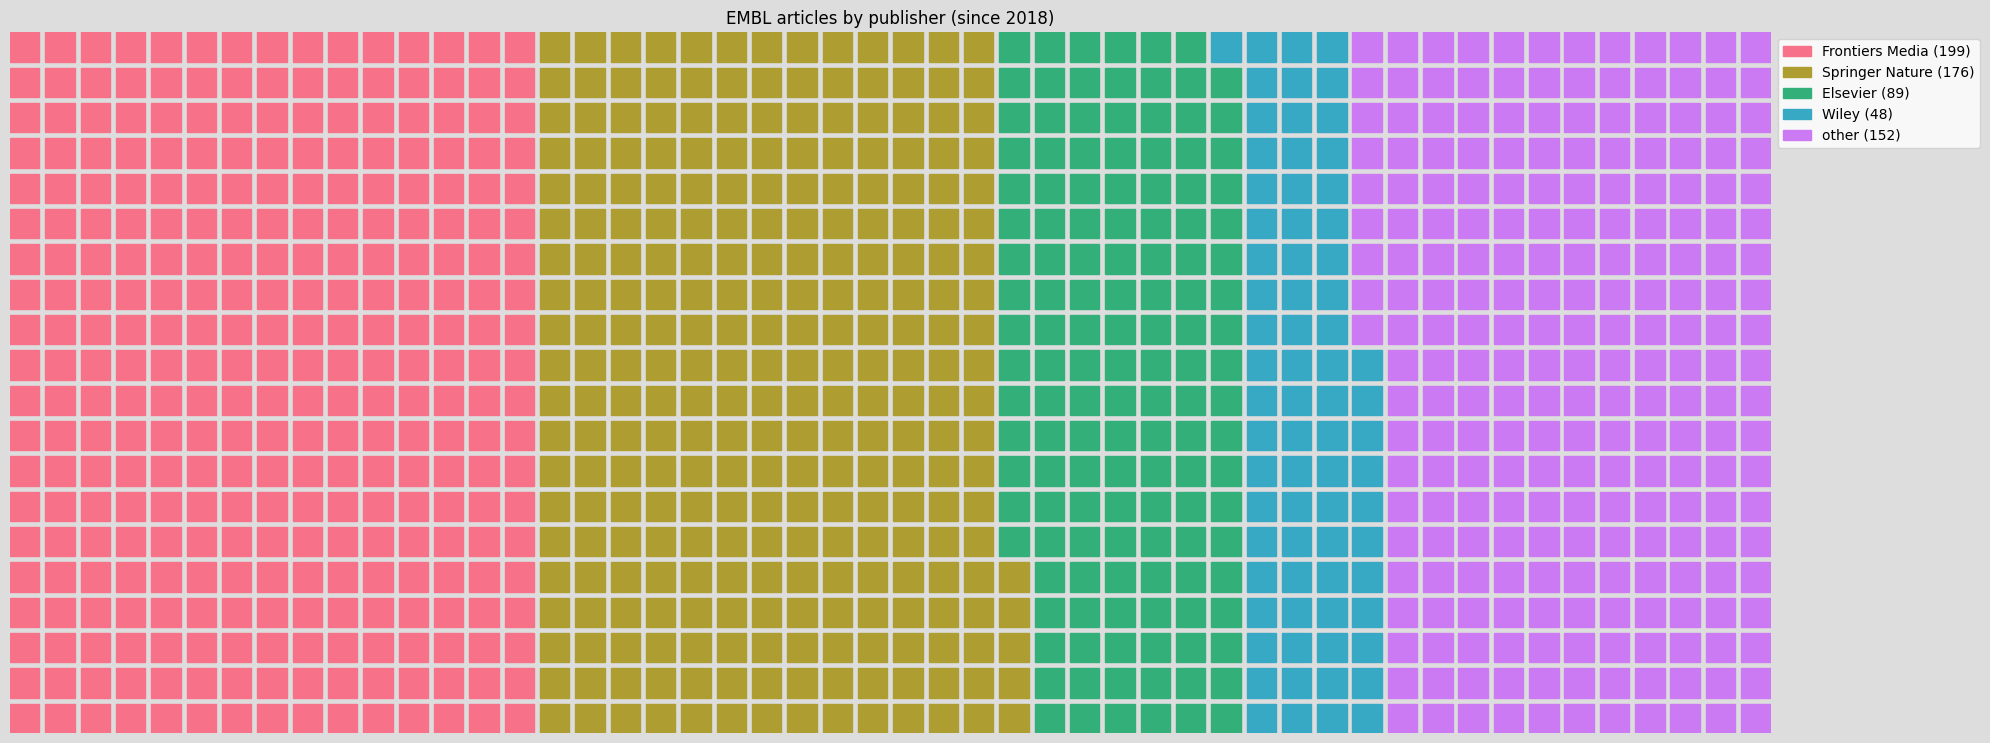

In [29]:
colours = list(
    sns.color_palette(
        # palette='Paired',
        palette='husl',
        n_colors=len(counts)
    ).as_hex()
)
plt.figure(
    FigureClass=Waffle,
    figsize=(20, 20),
    rows=20,
    columns=50,
    colors=colours,
    values=counts,
    labels=[f"{index} ({value})" for index, value in counts.items()],
    legend={
        # 'loc':'upper left',
        'bbox_to_anchor': (1, 1),
        # 'ncol':3,
        # 'fontsize':12
    },
    facecolor='#DDDDDD',
    title={
        "label": "EMBL articles by publisher (since 2018)",
    }
)
plt.savefig(os.path.join(conf.data_dir, "article_count_by_publisher.png"), bbox_inches="tight")
plt.show()

In [30]:
count_2 = df.s_publisher.value_counts(dropna=False)
percent = (count_2 * 100 / count_2.sum())
low_percent = percent[percent < 1]
other_percent = pd.Series(low_percent.sum(), index=['other'])
percent = percent.drop(low_percent.index)
percent = pd.concat([percent, other_percent])

AttributeError: module 'local.config' has no attribute 'data_dir'

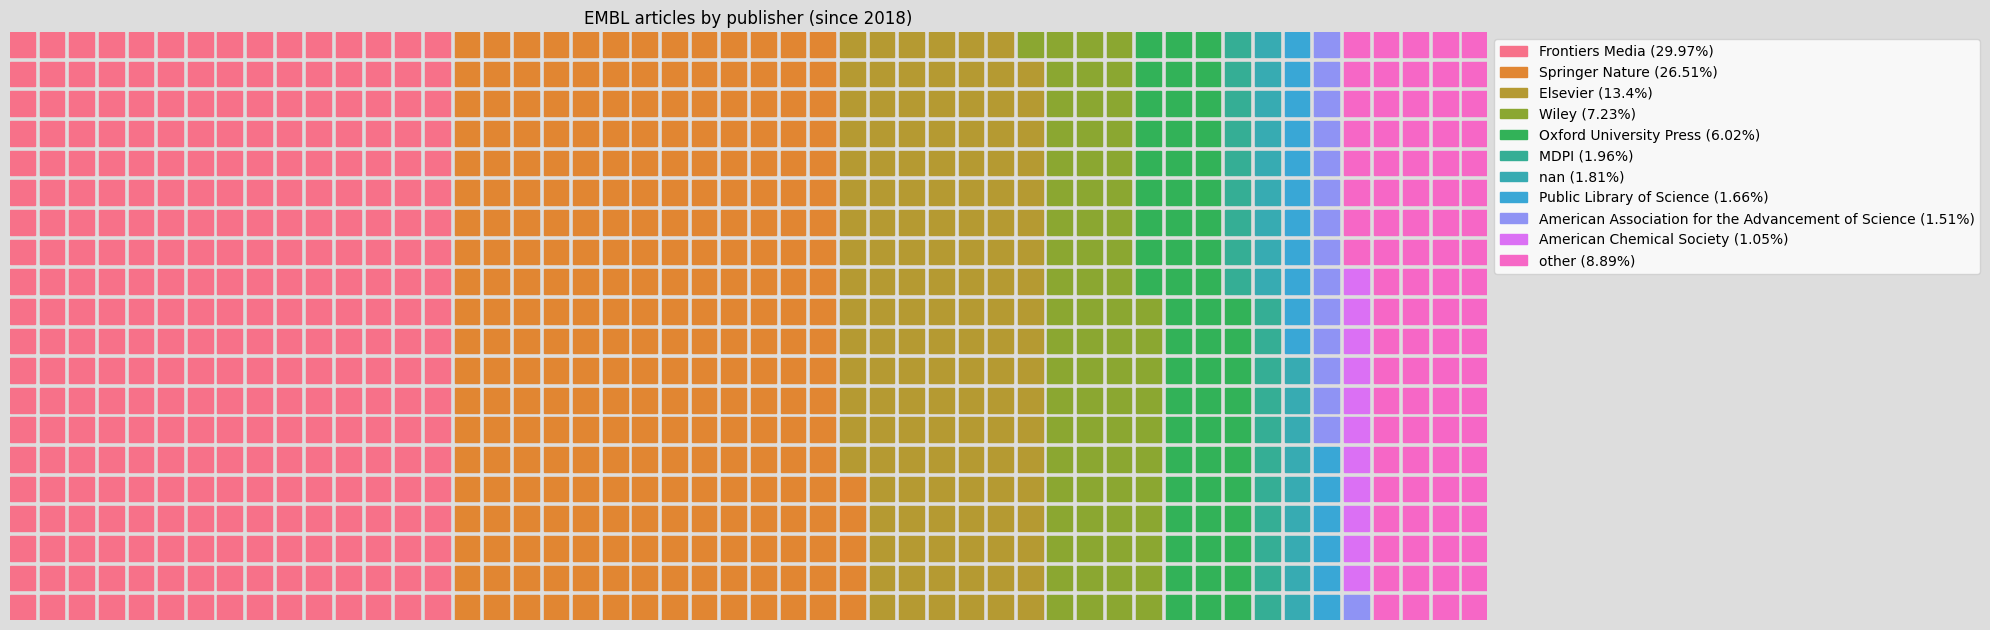

In [31]:
colours = list(
    sns.color_palette(
        # palette='Paired',
        palette='husl',
        n_colors=len(percent)
    ).as_hex()
)
plt.figure(
    FigureClass=Waffle,
    figsize=(20, 20),
    rows=20,
    columns=50,
    colors=colours,
    values=percent,
    labels=[f"{index} ({str(round(value, 2))}%)" for index, value in percent.items()],
    legend={
        # 'loc':'upper left',
        'bbox_to_anchor': (1, 1),
        # 'ncol':2,
        # 'fontsize':8
    },
    facecolor='#DDDDDD',
    title={
        "label": "EMBL articles by publisher (since 2018)",
    }
)
plt.savefig(os.path.join(conf.data_dir, "article_percentage_by_publisher.png"), bbox_inches="tight")
plt.show()

In [24]:
df.to_csv('2023_EMBL_closed_sherpa_results.tsv', sep = "\t")

In [25]:
df

Publication: Abstract  \
0   Atopic dermatitis (AD) is a multifactorial, ch...   
1   The packaging of DNA into chromatin in eukaryo...   
2   Eukaryotic tRNA guanine transglycosylase (TGT)...   
3   The Human BioMolecular Atlas Program (HuBMAP) ...   
4                                                 NaN   
..                                                ...   
74  Understanding autoimmunity to endogenous prote...   
75  We have studied by means of small angle neutro...   
76  The review highlights the role of amyloids in ...   
77  Glioblastomas are incurable tumors often assoc...   
78  Membrane proteins are responsible for a large ...   

    Publication: Abstract in other language  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   
..                                      ...   
74                                      NaN   
75                                      NaN   
76                                      NaN   
77                                      NaN   
78                                      NaN   

                       Publication: Address in source  \
0   Microbial Genomics Section, Translational and ...   
1                                                 NaN   
2   Department of Molecular Structural Biology, GZ...   
3                                                 NaN   
4                                                 NaN   
..                                                ...   
74  State Key Laboratory of Proteomics, Beijing Pr...   
75  Frank Laboratory of Neutron Physics, Joint Ins...   
76  Department of Biology, Technion-Israel Institu...   
77  Neurology Clinic and National Center for Tumor...   
78  European Molecular Biology Laboratory Hamburg,...   

                   Publication: Affiliation in source  \
0   Microbial Genomics Section, Translational and ...   
1   Structural and Computational Biology Unit, Eur...   
2   Department of Molecular Structural Biology, GZ...   
3                                                 NaN   
4                                                 NaN   
..                                                ...   
74  State Key Laboratory of Proteomics, Beijing Pr...   
75  Frank Laboratory of Neutron Physics, Joint Ins...   
76  Department of Biology, Technion-Israel Institu...   
77  Neurology Clinic and National Center for Tumor...   
78  European Molecular Biology Laboratory Hamburg,...   

    Publication: Annual report item time stamp  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   
..                                         ...   
74                                         NaN   
75                                         NaN   
76                                         NaN   
77                                         NaN   
78                                         NaN   

    Publication: Annual report report time stamp  Publication: Approval year  \
0                                            NaN                         NaN   
1                                            NaN                         NaN   
2                                            NaN                         NaN   
3                                            NaN                         NaN   
4                                            NaN                         NaN   
..                                           ...                         ...   
74                                           NaN                         NaN   
75                                           NaN                         NaN   
76                                           NaN                         NaN   
77         